# DMP

## Step 1: Import Required Libraries
We begin by importing the essential Python libraries used throughout this script:

In [ ]:
import ollama  # Local LLMs like Llama3 and DeepSeek
import openai  # GPT-4 API
import google.generativeai as genai #google AI
import pypandoc  # Convert Markdown to DOCX
import pandas as pd  # Handle structured data
import os  # File handling
from dotenv import load_dotenv  # Load API keys securely
# Load environment variables (ensure API keys are stored in a .env file)
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
#GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

# Set API keys
openai.api_key = OPENAI_API_KEY
# Configure Google Gemini API with the key
#genai.configure(api_key=GEMINI_API_KEY)

## Step 2: Define Functions

**Function 1**  Query LLaMA 3.3 (Ollama - Local Models)
This function is responsible for sending prompts to locally hosted LLaMA 3 or DeepSeek models using the Ollama interface and retrieving responses.

**Function 2**  Query Open AI
This function is responsible for sending prompts to GPT

**Function 3** Create a Directory if it Doesn't Exist
Ensures that a specified directory exists. If it does not, the function creates it.

**Function 4** Save Markdown Files
Saves the generated text content into a `.md` (Markdown) file format for documentation or further processing.

**Function 5**  Convert Markdown to DOCX
Takes markdown-formatted content and converts it into a `.docx` Word document, enabling easy viewing and sharing.


In [2]:

#Function1:Query Llama 3 & DeepSeek (Ollama - Local Models)
def ask_llm_ollama(model, query):
    """
    Queries an LLM model via Ollama (local models).

    Args:
        model (str): Name of the model in Ollama (must be installed locally).
        query (str): Query string to send to the model.

    Returns:
        str: Response from the LLM.
    """
    response = ollama.chat(model=model, messages=[{"role": "user", "content": query}])
    return response['message']['content']

In [3]:
#Function 2: Querying the LLM via OpenAI API
import openai

def ask_llm_openai(model, query):
    """
    Queries an LLM model via OpenAI API and returns the response.

    Args:
        model (str): Name of the OpenAI model (e.g., "gpt-4-turbo").
        query (str): Query string to send to the model.

    Returns:
        str: Response from the OpenAI model.
    """
    client = openai.OpenAI()  # Create a client instance

    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": query}],
        temperature=0.7  # Controls creativity level
    )

    return response.choices[0].message.content  # Extract and return the response

In [4]:
#Function3 : Create a Directory if it Doesn't Exist
def create_folder(folderpath):
    """
    Creates a folder at the specified path if it doesn't already exist.

    Args:
        folderpath (str): The path of the folder to create.
    """
    if not os.path.exists(folderpath):
        os.makedirs(folderpath)

In [5]:
#Function4: Save Markdown Files
def save_md(folderpath, filename, response):
    """
    Saves a given response as a Markdown (.md) file.

    Args:
        folderpath (str): Path where the file should be saved.
        filename (str): Name of the Markdown file.
        response (str): The text to be saved.
    """
    create_folder(folderpath)  # Ensure the folder exists
    filepath = os.path.join(folderpath, filename)  # Full file path
    with open(filepath, "w", encoding="utf-8") as f:
        f.write(response)  # Write response to file
    print(filepath, "saved")  # Confirmation message


In [6]:
#Function5 : Convert Markdown to DOCX
def md_to_docs(md_filepath, docx_folderpath, docx_filename):
    """
    Converts a Markdown file to a Word (.docx) document using pypandoc.

    Args:
        md_filepath (str): Path to the source Markdown file.
        docx_folderpath (str): Path where the DOCX file will be saved.
        docx_filename (str): Name of the DOCX file.
    """
    create_folder(docx_folderpath)  # Ensure the output folder exists
    docx_filepath = os.path.join(docx_folderpath, docx_filename)  # Full output file path
    pypandoc.convert_file(md_filepath, 'docx', outputfile=docx_filepath)  # Convert Markdown to DOCX
    print(docx_filepath, "saved")  # Confirmation message


## Step 3: Load Input Files

In this step, the script defines paths for input files and loads them into memory:

- **Excel File**: Contains the structured DMP data to be processed.
- **Markdown Template**: Serves as the base template for generating customized DMP content.


In [7]:

# Define file paths
import os
import pandas as pd
excel_path = "inputs/inputs.xlsx"
template_path = "inputs/dmp-template.md"

# Check and load Excel data
if os.path.exists(excel_path):
    df = pd.read_excel(excel_path)
    print("✅ Excel file loaded successfully!")
else:
    raise FileNotFoundError(f"❌ Error: The file '{excel_path}' was not found.")

# Check and load Markdown template
if os.path.exists(template_path):
    with open(template_path, 'r', encoding='utf-8') as file:
        dmp_template_text = file.read()
    print("✅ DMP template loaded successfully!")
else:
    raise FileNotFoundError(f"❌ Error: The file '{template_path}' was not found.")


✅ Excel file loaded successfully!
✅ DMP template loaded successfully!


## Step 4: Generate Model Outputs for NIH DMPs Using GPT and LLaMA

This step generates Data Management and Sharing Plans (DMSPs) using both OpenAI (GPT-4.1) and Ollama (LLaMA3.3) models across 10 repeated runs. Each model receives a customized prompt generated from structured metadata.

### 🔧 Inputs

- `df`: DataFrame containing DMP sample metadata (e.g., title, institute, human study flag, element_1A).
- `dmp_template_text`: The official NIH markdown-formatted DMP template.
- Model lists:
  - `openai_models = ["gpt-4.1"]`
  - `ollama_models = ["llama3.3"]`

### 🧠 Query Generation

- A detailed, context-aware query is created for each DMP using:
  - Targeted funding agency
  - Project-specific data collection (element 1A)
  - Human participant considerations (if applicable)
  - Fixed NIH-compliant markdown structure

The final query is stored in the `Generated Query` column and saved to `outputs/with_generated_queries.csv`.

---

### 🔁 Repeated Prompting (10 Runs)

For each of 10 runs:
- A clean folder structure is created:
  - `outputs/Gpt_result_in 10 run/approach1_outputs_Gpt_rX/`
  - `outputs/Llama_result_in 10 run/approach1_outputs_Llama_rX/`
- Each DMP is processed using the query:
  - **Saved as `.docx` for traceability**
  - **Query results saved as `.md` (markdown)**
  - Markdown files are converted to `.docx` for review.

---

### 🧾 Output Artifacts

For each run and each DMP:
- Input query saved as: `DMP_Title_query.docx`
- Model outputs saved as:
  - `openai-gpt-4.1.md` / `.docx`
  - `ollama-llama3.3.md` / `.docx`

This setup ensures repeatable and traceable generations of DMPs, supporting further automated evaluation and comparison.
"""

In [ ]:

# List of LLM models to be used (Ollama & OpenAI)
import ollama
import pandas as pd
import os
import pandas as pd
import re
from docx import Document
ollama_models = ["llama3.3"]
openai_models = ["gpt-4.1"]
#gemini_models = ["gemini-1.5-pro-latest"]

# Initial query template for NIH Data Management and Sharing Plan (DMP)
query_initiate = "You are an expert biomedical grant writer and data steward. Create a Data Management and Sharing Plan (DMSP) for a grant proposal being submitted to the National Institutes of Health (NIH), "

# Query format using the NIH template
query_template = "Provide the result using exactly this markdown format template of the DMSP provided by the NIH without changing it (keep all the titles and sections as is) to give me a well-formatted markdown output that follows the NIH-required format:" + dmp_template_text

# Function to generate query from a row
def generate_query(row):
    #query_dmp = f"For {row['DMP sample']} from this particular link {row['Link']}."
    query_funding_agency = f"Specifically targeting the {row['institute']}."
    query_Element1_A = (
        f"Here are the details about the data to be collected:\n"
        f"{row['element_1A']}\n"
    )

    if "yes" in str(row['isHumanStudy']).lower():
        query_consent_type = (
            f"This proposal includes a study that will involve human participants. {row['consentDescription']}."
        )
    else:
        query_consent_type = ""

    # Combine into final query
    query = " ".join([
        #query_dmp,
        query_initiate,
        query_funding_agency,
        query_Element1_A,
        query_consent_type,
        query_template
    ])
    
    return query


# Apply the function to each row and store in a new column
df["Generated Query"] = df.apply(generate_query, axis=1)

# (Optional) Save to a CSV or text file for inspection or later use
df.to_csv("outputs/with_generated_queries.csv", index=False)


In [ ]:
import os
import re
import pandas as pd
from docx import Document

# Utility: sanitize filenames
def clean_filename(name):
    return re.sub(r'[\\/*?:"<>|]', "_", name.strip())

# Utility: save query to Word
def save_query_doc(folderpath, name, query):
    doc = Document()
    doc.add_heading("Generated DMP Query", level=1)
    doc.add_paragraph(query)
    doc.save(os.path.join(folderpath, f"{name}_query.docx"))

# Utility: process models
def process_models(models, query_func, model_prefix, base_folder, query, dmp_name_clean):
    folderpath = os.path.join(base_folder, dmp_name_clean)
    os.makedirs(folderpath, exist_ok=True)
    save_query_doc(folderpath, dmp_name_clean, query)

    for model in models:
        response = query_func(model, query)
        modelname = model.replace(":", "-")
        filename = f"{model_prefix}-{modelname}.md"

        save_md(folderpath, filename, response)
        md_to_docs(
            os.path.join(folderpath, filename),
            folderpath,
            filename.replace(".md", ".docx")
        )

# Repeat the generation 10 times
for run in range(1, 10):
    print(f"🔁 Run {run} started...")

    # Define output base folders for this run
    output_base_openai = f"outputs/Gpt_result_in 10 run/approach1_outputs_Gpt_r{run}"
    output_base_ollama = f"outputs/Llama_result_in 10 run/approach1_outputs_Llama_r{run}"
    os.makedirs(output_base_openai, exist_ok=True)
    os.makedirs(output_base_ollama, exist_ok=True)

    # Loop through DataFrame and process
    for _, row in df.iterrows():
        query = row["Generated Query"]
        dmp_name_clean = clean_filename(str(row["title"]))

        # Process OpenAI models
        process_models(openai_models, ask_llm_openai, "openai", output_base_openai, query, dmp_name_clean)

        # Process Ollama models
        process_models(ollama_models, ask_llm_ollama, "ollama", output_base_ollama, query, dmp_name_clean)

    print(f"✅ Run {run} completed.\n")

print("🎉 All 10 runs are complete and results are saved.")


🔁 Run 1 started...
outputs/approach1_outputs_Gpt_r1\Clinical and MRI data from human research participants\openai-gpt-4.1.md saved
outputs/approach1_outputs_Gpt_r1\Clinical and MRI data from human research participants\openai-gpt-4.1.docx saved
outputs/approach1_outputs_Llama_r1\Clinical and MRI data from human research participants\ollama-llama3.3.md saved
outputs/approach1_outputs_Llama_r1\Clinical and MRI data from human research participants\ollama-llama3.3.docx saved
outputs/approach1_outputs_Gpt_r1\Genomic data from human research participants\openai-gpt-4.1.md saved
outputs/approach1_outputs_Gpt_r1\Genomic data from human research participants\openai-gpt-4.1.docx saved
outputs/approach1_outputs_Llama_r1\Genomic data from human research participants\ollama-llama3.3.md saved
outputs/approach1_outputs_Llama_r1\Genomic data from human research participants\ollama-llama3.3.docx saved
outputs/approach1_outputs_Gpt_r1\Genomic data from a non-human source\openai-gpt-4.1.md saved
outputs


## Step 5: Extract Element-Level Sections from LLM Markdown Outputs

After generating markdown responses from the LLMs in Step 4, this step parses the outputs to extract structured content under each NIH DMP section.

- **Title Detection**: Uses a helper function `is_title()` to identify section titles based on Markdown syntax (e.g., headers like `#`, or bold numbered titles like `1. **Element**`).

- **Tag Cleaning**: Removes any `<think>...</think>` tags that might have been inserted by the LLMs for internal reasoning, ensuring only final content is parsed.

- **Element Extraction**:
  - The function `extract_titles_and_text()` walks line-by-line through the markdown, grouping text under each detected title.
  - For each section, it stores:
    - The element title (e.g., `# 1. Data Type`)
    - The corresponding content generated by either GPT or LLaMA
  - The output is stored in a Pandas DataFrame with columns like `"Element title"` and `"Generated Gpt_content"` or `"Generated Llama_content"`.

- **Batch Processing Over 10 Runs**:
  - The script loops through all 10 run directories for both GPT and LLaMA outputs.
  - It identifies `.md` files by model-specific filename keywords (e.g., `"openai-gpt-4.1"`, `"ollama-llama3.3"`).
  - Extracted section-level content is saved as `filtered_Gpt.csv` or `filtered_Llama.csv` in each respective folder.

- **Purpose**: This structured extraction facilitates later comparison between LLM outputs and reference DMP elements, enabling granular evaluation 



In [38]:
import re
import pandas as pd

def is_title(line):
    """
    Checks if a line is a title based on markdown headers (lines starting with # or bolded numbered titles).
    """
    stripped = line.strip()
    return (
        stripped.startswith('#') or 
        bool(re.match(r'^\d*\.*\s*\*\*.*\*\*$', stripped))
    )

def extract_titles_and_text(file_path=None, markdown_text=None, model_name="gpt"):
    """
    Extracts titles and associated content from markdown text.
    Removes <think>...</think> tags and returns a DataFrame of titles and content.
    """
    if markdown_text:
        text = markdown_text
    elif file_path:
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
    else:
        raise ValueError("You must provide either a file path or markdown text.")
    
    cleaned_text = re.sub(r'<think>.*?</think>', '', text, flags=re.DOTALL)
    lines = cleaned_text.splitlines()

    entries = []
    current_title = None
    current_text = []

    content_column = (
        "Generated Gpt_content" if model_name.lower().startswith("gpt") 
        else "Generated Llama_content"
    )

    for line in lines:
        if is_title(line):
            if current_title and any(not is_title(ln) and ln.strip() for ln in current_text):
                entries.append({
                    "Element title": current_title.strip(),
                    content_column: '\n'.join(current_text).strip()
                })
            current_title = line
            current_text = []
        else:
            current_text.append(line)

    if current_title and any(not is_title(ln) and ln.strip() for ln in current_text):
        entries.append({
            "Element title": current_title.strip(),
            content_column: '\n'.join(current_text).strip()
        })

    return pd.DataFrame(entries)


In [39]:
import os

def process_md_files(output_base, model_keyword, output_filename, model_name="gpt"):
    for root, _, files in os.walk(output_base):
        for file in files:
            if file.endswith(".md") and model_keyword.lower() in file.lower():
                file_path = os.path.join(root, file)
                print(f"🔍 Processing: {file_path}")
                try:
                    df = extract_titles_and_text(file_path=file_path, model_name=model_name)
                    if not df.empty:
                        csv_path = os.path.join(root, output_filename)
                        df.to_csv(csv_path, index=False)
                        print(f"✅ Saved to: {csv_path}")
                    else:
                        print("⚠️ Empty DataFrame. Skipped.")
                except Exception as e:
                    print(f"❌ Error processing {file_path}: {e}")
                    
for run in range(1, 11):
    output_base_openai = f"outputs/Gpt_result_in 10 run/approach1_outputs_Gpt_r{run}"
    output_base_ollama = f"outputs/Llama_result_in 10 run/approach1_outputs_Llama_r{run}"

    print(f"\n📂 Run {run}: Processing GPT outputs")
    process_md_files(output_base_openai, "openai-gpt-4.1", "filtered_Gpt.csv", model_name="gpt")

    print(f"\n📂 Run {run}: Processing LLaMA outputs")
    process_md_files(output_base_ollama, "ollama-llama3.3", "filtered_Llama.csv", model_name="llama")




📂 Run 1: Processing GPT outputs
🔍 Processing: outputs/Gpt_result_in 10 run/approach1_outputs_Gpt_r1\Analysis of social media posts\openai-gpt-4.1.md
✅ Saved to: outputs/Gpt_result_in 10 run/approach1_outputs_Gpt_r1\Analysis of social media posts\filtered_Gpt.csv
🔍 Processing: outputs/Gpt_result_in 10 run/approach1_outputs_Gpt_r1\Basic Research from a Non-Human Source Example\openai-gpt-4.1.md
✅ Saved to: outputs/Gpt_result_in 10 run/approach1_outputs_Gpt_r1\Basic Research from a Non-Human Source Example\filtered_Gpt.csv
🔍 Processing: outputs/Gpt_result_in 10 run/approach1_outputs_Gpt_r1\Clinical and MRI data from human research participants\openai-gpt-4.1.md
✅ Saved to: outputs/Gpt_result_in 10 run/approach1_outputs_Gpt_r1\Clinical and MRI data from human research participants\filtered_Gpt.csv
🔍 Processing: outputs/Gpt_result_in 10 run/approach1_outputs_Gpt_r1\Clinical data (human biospecimens)\openai-gpt-4.1.md
✅ Saved to: outputs/Gpt_result_in 10 run/approach1_outputs_Gpt_r1\Clinica


## Step 6: Align NIH Elements with LLM-Generated Content (GPT & LLaMA)

This step integrates the NIH-provided data with the corresponding outputs from large language models (LLaMA and GPT):

- **Excel Preparation**:  
  Loads and cleans the NIH metadata file by selecting relevant element columns and normalizing the titles for accurate matching.

- **Folder Matching**:  
  Iterates through output folders for each run, matching each folder (representing a specific DMP) with the corresponding row from the Excel file using the normalized title.

- **Transposition**:  
  Transposes the matched NIH row to align each element with its label, creating a vertical format suitable for merging.

- **Merging Output**:  
  Loads the previously extracted `filtered_Gpt.csv` or `filtered_Llama.csv` file, which contains model-generated content, and aligns it with the transposed NIH values element-by-element.

- **Output Storage**:  
  The final merged DataFrame includes:
  - `Element number`
  - `NIH Value`
  - `Generated Content` (GPT or LLaMA)
  
  It is saved as `merged_output_Gpt.csv` or `merged_output_Llama.csv` inside each respective folder.

This step ensures a direct side-by-side comparison between the reference NIH content and the LLM-generated outputs for downstream evaluation.
"""


In [40]:
import os
import pandas as pd

# === Step 1: Load and prepare the NIH reference Excel ===
df = pd.read_excel('inputs/inputs.xlsx', sheet_name='sheet')
df.columns = df.columns.str.strip().str.lower()

# Keep only relevant NIH columns
selected_columns = [
    'title',
    'element_1a', 'element_1b', 'element_1c',
    'element_2',
    'element_3',
    'element_4a', 'element_4b', 'element_4c',
    'element_5a', 'element_5b', 'element_5c',
    'element_6'
]

# Clean data
df_selected = df[selected_columns].copy()
df_selected = df_selected.fillna("").applymap(str.strip)
df_selected['title_norm'] = df_selected['title'].str.lower()

# === Step 2: Function to merge NIH reference with model-generated outputs ===
def process_model_outputs(base_folder, run_prefix, filtered_filename, merged_filename, model_name):
    """
    Merges NIH elements with model-generated content for each run and saves output to CSV.
    """
    for run in range(1, 11):
        output_base = os.path.join(base_folder, f"{run_prefix}_r{run}")

        for folder_title in os.listdir(output_base):
            folder_path = os.path.join(output_base, folder_title)
            if not os.path.isdir(folder_path):
                continue

            # Match folder to NIH row
            folder_title_norm = folder_title.strip().lower()
            matched_row = df_selected[df_selected['title_norm'] == folder_title_norm]

            if matched_row.empty:
                print(f"⚠️ No matching row in Excel for: {folder_title}")
                continue

            row = matched_row.iloc[0]

            # Transpose NIH row into element format
            transposed = row.to_frame(name='NIH Value').reset_index()
            transposed.columns = ['Element number', 'NIH Value']
            transposed = transposed[~transposed['Element number'].isin(['title', 'title_norm'])].reset_index(drop=True)

            # Load model output CSV
            csv_path = os.path.join(folder_path, filtered_filename)
            if not os.path.exists(csv_path):
                print(f"❌ {filtered_filename} not found in {folder_path}")
                continue

            try:
                model_df = pd.read_csv(csv_path)

                # Locate model content column
                content_col_name = f"Generated {model_name.capitalize()}_content"
                if content_col_name not in model_df.columns:
                    print(f"⚠️ Column '{content_col_name}' not found in {csv_path}.")
                    continue

                content_col = model_df[content_col_name].reset_index(drop=True)

                # Merge with NIH data
                combined = transposed.copy()
                combined['Title'] = row['title']
                combined['Generated Content'] = content_col[:len(combined)]  # align lengths

                # Reorder columns
                combined = combined[['Element number', 'NIH Value', 'Generated Content']]

                # Save merged CSV
                save_path = os.path.join(folder_path, merged_filename)
                combined.to_csv(save_path, index=False)
                print(f"✅ Merged output saved to: {save_path}")

            except Exception as e:
                print(f"❌ Error processing {folder_title} in run {run}: {e}")

# === Step 3: Run merging for both GPT and LLaMA ===
process_model_outputs(
    base_folder="outputs/Gpt_result_in 10 run",
    run_prefix="approach1_outputs_Gpt",
    filtered_filename="filtered_Gpt.csv",
    merged_filename="merged_output_Gpt.csv",
    model_name="gpt"
)

process_model_outputs(
    base_folder="outputs/Llama_result_in 10 run",
    run_prefix="approach1_outputs_Llama",
    filtered_filename="filtered_Llama.csv",
    merged_filename="merged_output_Llama.csv",
    model_name="llama"
)

print("🎉 All GPT and LLaMA model outputs have been successfully merged with NIH reference.")


C:\Users\Nahid\AppData\Local\Temp\ipykernel_51652\1039483341.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_selected = df_selected.fillna("").applymap(str.strip)


✅ Merged output saved to: outputs/Gpt_result_in 10 run\approach1_outputs_Gpt_r1\Analysis of social media posts\merged_output_Gpt.csv
✅ Merged output saved to: outputs/Gpt_result_in 10 run\approach1_outputs_Gpt_r1\Basic Research from a Non-Human Source Example\merged_output_Gpt.csv
✅ Merged output saved to: outputs/Gpt_result_in 10 run\approach1_outputs_Gpt_r1\Clinical and MRI data from human research participants\merged_output_Gpt.csv
✅ Merged output saved to: outputs/Gpt_result_in 10 run\approach1_outputs_Gpt_r1\Clinical data (human biospecimens)\merged_output_Gpt.csv
✅ Merged output saved to: outputs/Gpt_result_in 10 run\approach1_outputs_Gpt_r1\Clinical Data from Human Research Participants\merged_output_Gpt.csv
✅ Merged output saved to: outputs/Gpt_result_in 10 run\approach1_outputs_Gpt_r1\Clinical data from human research participants-NIA\merged_output_Gpt.csv
✅ Merged output saved to: outputs/Gpt_result_in 10 run\approach1_outputs_Gpt_r1\Drug discovery including intellectual prop

In [3]:
import os
import pandas as pd
import re

# Base model folders
base_paths = {
    "Gpt": "outputs/Gpt_result_in 10 run",
    "Llama": "outputs/Llama_result_in 10 run"
}

group_map = {
    'element_1': ['element_1a', 'element_1b', 'element_1c'],
    'element_4': ['element_4a', 'element_4b', 'element_4c'],
    'element_5': ['element_5a', 'element_5b', 'element_5c']
}

def clean_text(text):
    """Remove multiple blank lines, leading/trailing spaces and newlines."""
    if pd.isna(text):
        return ''
    # Remove leading/trailing whitespace/newlines
    text = text.strip()
    # Replace 2+ consecutive newlines with a single newline
    text = re.sub(r'\n\s*\n+', '\n', text)
    return text

for model_name, root_folder in base_paths.items():
    print(f"\n🔍 Processing model: {model_name}")

    for run in range(1, 11):
        run_folder = os.path.join(root_folder, f"approach1_outputs_{model_name}_r{run}")
        if not os.path.isdir(run_folder):
            continue

        for folder_title in os.listdir(run_folder):
            folder_path = os.path.join(run_folder, folder_title)
            if not os.path.isdir(folder_path):
                continue

            merged_filename = f"merged_output_{model_name}.csv"
            merged_path = os.path.join(folder_path, merged_filename)
            if not os.path.exists(merged_path):
                print(f"⚠️ {merged_filename} not found in {folder_path}")
                continue

            try:
                df = pd.read_csv(merged_path)
                remaining_df = df[~df['Element number'].isin(sum(group_map.values(), []))].copy()

                merged_rows = []
                for new_element, group in group_map.items():
                    group_df = df[df['Element number'].isin(group)]
                    merged_value = "\n\n".join(group_df['NIH Value'].dropna())
                    merged_generated = "\n\n".join(group_df['Generated Content'].dropna())
                    merged_rows.append({
                        'Element number': new_element,
                        'NIH Value': merged_value,
                        'Generated Content': merged_generated
                    })

                final_df = pd.concat([remaining_df, pd.DataFrame(merged_rows)], ignore_index=True)
                final_df = final_df.sort_values(by='Element number').reset_index(drop=True)

                # Clean line spaces in the final dataframe
                for col in ['NIH Value', 'Generated Content']:
                    final_df[col] = final_df[col].astype(str).apply(clean_text)

                # Save to a new file in the same folder, or you can specify a different target folder
                output_path = os.path.join(folder_path, f"merged_output_{model_name}_cleaned.csv")
                final_df.to_csv(output_path, index=False)
                print(f"✅ Cleaned file saved to {output_path}")

            except Exception as e:
                print(f"❌ Error processing {merged_path}: {e}")



🔍 Processing model: Gpt
✅ Cleaned file saved to outputs/Gpt_result_in 10 run\approach1_outputs_Gpt_r1\Analysis of social media posts\merged_output_Gpt_cleaned.csv
✅ Cleaned file saved to outputs/Gpt_result_in 10 run\approach1_outputs_Gpt_r1\Basic Research from a Non-Human Source Example\merged_output_Gpt_cleaned.csv
✅ Cleaned file saved to outputs/Gpt_result_in 10 run\approach1_outputs_Gpt_r1\Clinical and MRI data from human research participants\merged_output_Gpt_cleaned.csv
✅ Cleaned file saved to outputs/Gpt_result_in 10 run\approach1_outputs_Gpt_r1\Clinical data (human biospecimens)\merged_output_Gpt_cleaned.csv
✅ Cleaned file saved to outputs/Gpt_result_in 10 run\approach1_outputs_Gpt_r1\Clinical Data from Human Research Participants\merged_output_Gpt_cleaned.csv
✅ Cleaned file saved to outputs/Gpt_result_in 10 run\approach1_outputs_Gpt_r1\Clinical data from human research participants-NIA\merged_output_Gpt_cleaned.csv
✅ Cleaned file saved to outputs/Gpt_result_in 10 run\approach


## Step 7: Automatic Evaluation of Generated Outputs (SBERT & ROUGE-L)

This step evaluates the quality of LLM-generated content (from GPT and LLaMA) by comparing it with NIH reference content using two metrics:

- **SBERT Semantic Similarity**: Measures the semantic closeness between NIH and generated text using cosine similarity of embeddings from `all-MiniLM-L6-v2`.
- **ROUGE-L Recall**: Measures phrase overlap using ROUGE-L recall to assess content coverage.

### 🧠 Evaluation Workflow

- **Model Setup**: Loads SBERT and ROUGE scorer.
- **Model Runs**: Iterates through 10 runs for each model (`GPT` and `LLaMA`), and:
  - For each output folder:
    - Loads the merged CSV (`merged_output_Gpt.csv` or `merged_output_Llama.csv`)
    - Compares each row’s `NIH Value` and `Generated Content`
    - Computes:
      - SBERT cosine similarity
      - ROUGE-L recall
    - Logs per-element and per-folder metrics

### 📄 Output Files

Each model produces the following outputs, saved both inside its own folder and in shared summary directories:

- `folder_similarity_summary_<Model>.csv`:  
  Mean SBERT and ROUGE-L scores **per folder** (i.e., per DMP).
  
- `element_similarity_raw_<Model>.csv`:  
  Raw SBERT and ROUGE-L scores for **every element** across all runs.
  
- `element_similarity_summary_<Model>.csv`:  
  Element-level summary (includes all 10-run rows, suitable for plotting/averaging).

These outputs enable structured comparison across runs and models for downstream statistical and visual analysis.


In [74]:
import os
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from rouge_score import rouge_scorer

# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')
rouge = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

# Base model folders
base_paths = {
    "Gpt": "outputs/Gpt_result_in 10 run",
    "Llama": "outputs/Llama_result_in 10 run"
}

# Shared folders
shared_folder_summary_dir = "outputs/folder_similarity_summary"
shared_element_summary_dir = "outputs/element_similarity_summary"
os.makedirs(shared_folder_summary_dir, exist_ok=True)
os.makedirs(shared_element_summary_dir, exist_ok=True)

# Process both models
for model_name, root_folder in base_paths.items():
    print(f"\n🔍 Processing model: {model_name}")

    all_folder_averages = []
    all_element_similarities = []

    for run in range(1, 11):
        run_folder = os.path.join(root_folder, f"approach1_outputs_{model_name}_r{run}")
        if not os.path.isdir(run_folder):
            continue

        for folder_title in os.listdir(run_folder):
            folder_path = os.path.join(run_folder, folder_title)
            if not os.path.isdir(folder_path):
                continue

            merged_filename = f"merged_output_{model_name}.csv"
            merged_path = os.path.join(folder_path, merged_filename)
            if not os.path.exists(merged_path):
                print(f"⚠️ {merged_filename} not found in {folder_path}")
                continue

            try:
                df = pd.read_csv(merged_path)
                required_cols = ['Element number', 'NIH Value', 'Generated Content']
                if not all(col in df.columns for col in required_cols):
                    print(f"⚠️ Missing required columns in {folder_path}")
                    continue

                sims, rouges = [], []

                for _, row in df.iterrows():
                    text1 = str(row['NIH Value'])
                    text2 = str(row['Generated Content'])

                    emb1 = model.encode(text1, convert_to_tensor=True)
                    emb2 = model.encode(text2, convert_to_tensor=True)
                    similarity = util.cos_sim(emb1, emb2).item()
                    sims.append(similarity)

                    rouge_scores = rouge.score(text1, text2)
                    rouge_l_recall = rouge_scores['rougeL'].recall
                    rouges.append(rouge_l_recall)

                    all_element_similarities.append({
                        'Model': model_name,
                        'Run': run,
                        'Element number': row['Element number'],
                        'SBERT_Similarity': similarity,
                        'ROUGE_L_Recall': rouge_l_recall
                    })

                df = df[['Element number', 'NIH Value', 'Generated Content']]
                df.to_csv(merged_path, index=False)

                avg_sim = sum(sims) / len(sims) if sims else 0.0
                avg_rouge = sum(rouges) / len(rouges) if rouges else 0.0

                all_folder_averages.append({
                    'Model': model_name,
                    'Run': run,
                    'Folder': folder_title,
                    'SBERT_Similarity': avg_sim,
                    'ROUGE_L_Recall': avg_rouge
                })

                print(f"✅ Run {run} | {model_name} | {folder_title} | SBERT: {avg_sim:.4f} | ROUGE-L: {avg_rouge:.4f}")

            except Exception as e:
                print(f"❌ Error processing {folder_path}: {e}")

    # === Save model-specific summaries ===
    model_summary_dir = os.path.join(root_folder, "final_summary")
    os.makedirs(model_summary_dir, exist_ok=True)

    # Folder-level summary
    folder_df = pd.DataFrame(all_folder_averages)
    folder_path_model = os.path.join(model_summary_dir, f"folder_similarity_summary_{model_name}.csv")
    folder_path_shared = os.path.join(shared_folder_summary_dir, f"folder_similarity_summary_{model_name}.csv")
    folder_df.to_csv(folder_path_model, index=False)
    folder_df.to_csv(folder_path_shared, index=False)

    # Element-level summary
    element_df = pd.DataFrame(all_element_similarities)
    element_df.to_csv(os.path.join(model_summary_dir, f"element_similarity_raw_{model_name}.csv"), index=False)

    # If you want to keep all 10 runs per element
    element_path_model = os.path.join(model_summary_dir, f"element_similarity_summary_{model_name}.csv")
    element_path_shared = os.path.join(shared_element_summary_dir, f"element_similarity_summary_{model_name}.csv")
    element_df.to_csv(element_path_model, index=False)
    element_df.to_csv(element_path_shared, index=False)


    print(f"📁 Saved all summaries for {model_name} to:")
    print(f"   - Folder summary: {folder_path_shared}")
    print(f"   - Element summary: {element_path_shared}")



🔍 Processing model: Gpt
✅ Run 1 | Gpt | Analysis of social media posts | SBERT: 0.6620 | ROUGE-L: 0.2769
✅ Run 1 | Gpt | Basic Research from a Non-Human Source Example | SBERT: 0.6697 | ROUGE-L: 0.2716
✅ Run 1 | Gpt | Clinical and MRI data from human research participants | SBERT: 0.6068 | ROUGE-L: 0.2544
✅ Run 1 | Gpt | Clinical data (human biospecimens) | SBERT: 0.6391 | ROUGE-L: 0.2994
✅ Run 1 | Gpt | Clinical Data from Human Research Participants | SBERT: 0.6389 | ROUGE-L: 0.2569
✅ Run 1 | Gpt | Clinical data from human research participants-NIA | SBERT: 0.6675 | ROUGE-L: 0.2878
✅ Run 1 | Gpt | Drug discovery including intellectual property | SBERT: 0.5797 | ROUGE-L: 0.2431
✅ Run 1 | Gpt | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6229 | ROUGE-L: 0.2540
✅ Run 1 | Gpt | Genomic data from a non-human source | SBERT: 0.5597 | ROUGE-L: 0.2329
✅ Run 1 | Gpt | Genomic data from human research participants | SBERT: 0.6069 | ROUGE-L: 0.3148
✅ Run 1

In [10]:
#! python -m pip install sentence-transformers
#! python -m pip install rouge-score

In [11]:
import os 
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from rouge_score import rouge_scorer

# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')
rouge = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

# Base model folders
base_paths = {
    "Gpt": "outputs/Gpt_result_in 10 run",
    "Llama": "outputs/Llama_result_in 10 run"
}

# Shared folders
shared_folder_summary_dir = "outputs/folder_similarity_summary"
shared_element_summary_dir = "outputs/element_similarity_summary"
os.makedirs(shared_folder_summary_dir, exist_ok=True)
os.makedirs(shared_element_summary_dir, exist_ok=True)

# Process both models
for model_name, root_folder in base_paths.items():
    print(f"\n🔍 Processing model: {model_name}")

    all_folder_averages = []
    all_element_similarities = []

    for run in range(1, 11):
        run_folder = os.path.join(root_folder, f"approach1_outputs_{model_name}_r{run}")
        if not os.path.isdir(run_folder):
            continue

        for folder_title in os.listdir(run_folder):
            folder_path = os.path.join(run_folder, folder_title)
            if not os.path.isdir(folder_path):
                continue

            # Use the cleaned/merged CSV!
            merged_filename = f"merged_output_{model_name}_cleaned.csv"
            merged_path = os.path.join(folder_path, merged_filename)
            if not os.path.exists(merged_path):
                print(f"⚠️ {merged_filename} not found in {folder_path}")
                continue

            try:
                df = pd.read_csv(merged_path)
                required_cols = ['Element number', 'NIH Value', 'Generated Content']
                if not all(col in df.columns for col in required_cols):
                    print(f"⚠️ Missing required columns in {folder_path}")
                    continue

                sims, rouges = [], []

                for _, row in df.iterrows():
                    text1 = str(row['NIH Value'])
                    text2 = str(row['Generated Content'])

                    emb1 = model.encode(text1, convert_to_tensor=True)
                    emb2 = model.encode(text2, convert_to_tensor=True)
                    similarity = util.cos_sim(emb1, emb2).item()
                    sims.append(similarity)

                    rouge_scores = rouge.score(text1, text2)
                    rouge_l_recall = rouge_scores['rougeL'].recall
                    rouges.append(rouge_l_recall)

                    all_element_similarities.append({
                        'Model': model_name,
                        'Run': run,
                        'Element number': row['Element number'],
                        'SBERT_Similarity': similarity,
                        'ROUGE_L_Recall': rouge_l_recall
                    })

                avg_sim = sum(sims) / len(sims) if sims else 0.0
                avg_rouge = sum(rouges) / len(rouges) if rouges else 0.0

                all_folder_averages.append({
                    'Model': model_name,
                    'Run': run,
                    'Folder': folder_title,
                    'SBERT_Similarity': avg_sim,
                    'ROUGE_L_Recall': avg_rouge
                })

                print(f"✅ Run {run} | {model_name} | {folder_title} | SBERT: {avg_sim:.4f} | ROUGE-L: {avg_rouge:.4f}")

            except Exception as e:
                print(f"❌ Error processing {folder_path}: {e}")

    # === Save model-specific summaries ===
    model_summary_dir = os.path.join(root_folder, "final_summary")
    os.makedirs(model_summary_dir, exist_ok=True)

    # Folder-level summary
    folder_df = pd.DataFrame(all_folder_averages)
    folder_path_model = os.path.join(model_summary_dir, f"folder_similarity_summary_{model_name}_elementlevel.csv")
    folder_path_shared = os.path.join(shared_folder_summary_dir, f"folder_similarity_summary_{model_name}_elementlevel.csv")
    folder_df.to_csv(folder_path_model, index=False)
    folder_df.to_csv(folder_path_shared, index=False)

    # Element-level summary
    element_df = pd.DataFrame(all_element_similarities)
    element_path_model = os.path.join(model_summary_dir, f"element_similarity_summary_{model_name}_elementlevel.csv")
    element_path_shared = os.path.join(shared_element_summary_dir, f"element_similarity_summary_{model_name}_elementlevel.csv")
    element_df.to_csv(element_path_model, index=False)
    element_df.to_csv(element_path_shared, index=False)

    print(f"📁 Saved all summaries for {model_name} to:")
    print(f"   - Folder summary: {folder_path_shared}")
    print(f"   - Element summary: {element_path_shared}")



🔍 Processing model: Gpt


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Analysis of social media posts | SBERT: 0.7139 | ROUGE-L: 0.3195


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Basic Research from a Non-Human Source Example | SBERT: 0.7272 | ROUGE-L: 0.2174


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Clinical and MRI data from human research participants | SBERT: 0.6625 | ROUGE-L: 0.2031


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Clinical data (human biospecimens) | SBERT: 0.6842 | ROUGE-L: 0.2741


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Clinical Data from Human Research Participants | SBERT: 0.6863 | ROUGE-L: 0.2470


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Clinical data from human research participants-NIA | SBERT: 0.7290 | ROUGE-L: 0.2723


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Drug discovery including intellectual property | SBERT: 0.5925 | ROUGE-L: 0.2161


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6614 | ROUGE-L: 0.2287


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Genomic data from a non-human source | SBERT: 0.5979 | ROUGE-L: 0.2544


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Genomic data from human research participants | SBERT: 0.6339 | ROUGE-L: 0.2115


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6941 | ROUGE-L: 0.3223


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Human clinical and genomic data-NIA | SBERT: 0.7282 | ROUGE-L: 0.2559


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Human clinical and genomics data | SBERT: 0.7261 | ROUGE-L: 0.2508


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Human Clinical Trial Data | SBERT: 0.6273 | ROUGE-L: 0.1856


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Human genomic data | SBERT: 0.6976 | ROUGE-L: 0.2192


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Human survey data | SBERT: 0.7127 | ROUGE-L: 0.2865


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Non-human data (primates) | SBERT: 0.6375 | ROUGE-L: 0.3386


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Non-human data (rodents)-NIA | SBERT: 0.7221 | ROUGE-L: 0.2894


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Secondary data analysis | SBERT: 0.7319 | ROUGE-L: 0.1803


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Secondary Data Analysis Example | SBERT: 0.6525 | ROUGE-L: 0.2582


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.7076 | ROUGE-L: 0.2370


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Secondary data analysis-NIA | SBERT: 0.6719 | ROUGE-L: 0.3526


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Survey and interview data-NIA | SBERT: 0.7388 | ROUGE-L: 0.3903


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Survey and Interview Example | SBERT: 0.6761 | ROUGE-L: 0.1908


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Survey, interview, and biological data (tiered access) | SBERT: 0.6222 | ROUGE-L: 0.3352


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Gpt | Technology development | SBERT: 0.6750 | ROUGE-L: 0.2720


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Analysis of social media posts | SBERT: 0.7283 | ROUGE-L: 0.2830


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Basic Research from a Non-Human Source Example | SBERT: 0.7358 | ROUGE-L: 0.2072


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Clinical and MRI data from human research participants | SBERT: 0.6618 | ROUGE-L: 0.2266


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Clinical data (human biospecimens) | SBERT: 0.6752 | ROUGE-L: 0.2473


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Clinical Data from Human Research Participants | SBERT: 0.6421 | ROUGE-L: 0.2325


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Clinical data from human research participants-NIA | SBERT: 0.7489 | ROUGE-L: 0.2898


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Drug discovery including intellectual property | SBERT: 0.6400 | ROUGE-L: 0.1870


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6892 | ROUGE-L: 0.2716


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Genomic data from a non-human source | SBERT: 0.5822 | ROUGE-L: 0.3009


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Genomic data from human research participants | SBERT: 0.6253 | ROUGE-L: 0.2047


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6991 | ROUGE-L: 0.2990


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Human clinical and genomic data-NIA | SBERT: 0.7670 | ROUGE-L: 0.2622


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Human clinical and genomics data | SBERT: 0.7363 | ROUGE-L: 0.2555


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Human Clinical Trial Data | SBERT: 0.6463 | ROUGE-L: 0.1867


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Human genomic data | SBERT: 0.7028 | ROUGE-L: 0.2237


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Human survey data | SBERT: 0.6813 | ROUGE-L: 0.3099


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Non-human data (primates) | SBERT: 0.6351 | ROUGE-L: 0.3521


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Non-human data (rodents)-NIA | SBERT: 0.7467 | ROUGE-L: 0.3168


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Secondary data analysis | SBERT: 0.7236 | ROUGE-L: 0.1718


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Secondary Data Analysis Example | SBERT: 0.6527 | ROUGE-L: 0.2595


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.6810 | ROUGE-L: 0.2395


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Secondary data analysis-NIA | SBERT: 0.6813 | ROUGE-L: 0.3276


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Survey and interview data-NIA | SBERT: 0.6767 | ROUGE-L: 0.3420


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Survey and Interview Example | SBERT: 0.7025 | ROUGE-L: 0.2132


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Survey, interview, and biological data (tiered access) | SBERT: 0.6461 | ROUGE-L: 0.3269


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Gpt | Technology development | SBERT: 0.6963 | ROUGE-L: 0.2592


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Analysis of social media posts | SBERT: 0.7026 | ROUGE-L: 0.2981


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Basic Research from a Non-Human Source Example | SBERT: 0.7206 | ROUGE-L: 0.2163


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Clinical and MRI data from human research participants | SBERT: 0.6512 | ROUGE-L: 0.2104


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Clinical data (human biospecimens) | SBERT: 0.6637 | ROUGE-L: 0.2723


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Clinical Data from Human Research Participants | SBERT: 0.6947 | ROUGE-L: 0.2583


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Clinical data from human research participants-NIA | SBERT: 0.7320 | ROUGE-L: 0.2761


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Drug discovery including intellectual property | SBERT: 0.6279 | ROUGE-L: 0.2332


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6647 | ROUGE-L: 0.2514


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Genomic data from a non-human source | SBERT: 0.5673 | ROUGE-L: 0.2585


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Genomic data from human research participants | SBERT: 0.6284 | ROUGE-L: 0.2002


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.7108 | ROUGE-L: 0.2910


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Human clinical and genomic data-NIA | SBERT: 0.7845 | ROUGE-L: 0.2667


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Human clinical and genomics data | SBERT: 0.7239 | ROUGE-L: 0.2649


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Human Clinical Trial Data | SBERT: 0.6217 | ROUGE-L: 0.1912


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Human genomic data | SBERT: 0.6779 | ROUGE-L: 0.2131


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Human survey data | SBERT: 0.7384 | ROUGE-L: 0.2924


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Non-human data (primates) | SBERT: 0.6351 | ROUGE-L: 0.3345


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Non-human data (rodents)-NIA | SBERT: 0.7170 | ROUGE-L: 0.2741


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Secondary data analysis | SBERT: 0.7062 | ROUGE-L: 0.1773


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Secondary Data Analysis Example | SBERT: 0.6474 | ROUGE-L: 0.2652


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.6803 | ROUGE-L: 0.2428


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Secondary data analysis-NIA | SBERT: 0.7008 | ROUGE-L: 0.3842


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Survey and interview data-NIA | SBERT: 0.7083 | ROUGE-L: 0.3500


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Survey and Interview Example | SBERT: 0.6951 | ROUGE-L: 0.2037


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Survey, interview, and biological data (tiered access) | SBERT: 0.6162 | ROUGE-L: 0.3339


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Gpt | Technology development | SBERT: 0.6574 | ROUGE-L: 0.2340


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Analysis of social media posts | SBERT: 0.7307 | ROUGE-L: 0.3442


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Basic Research from a Non-Human Source Example | SBERT: 0.7444 | ROUGE-L: 0.2407


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Clinical and MRI data from human research participants | SBERT: 0.6559 | ROUGE-L: 0.2003


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Clinical data (human biospecimens) | SBERT: 0.6870 | ROUGE-L: 0.2464


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Clinical Data from Human Research Participants | SBERT: 0.6292 | ROUGE-L: 0.2192


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Clinical data from human research participants-NIA | SBERT: 0.7175 | ROUGE-L: 0.2732


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Drug discovery including intellectual property | SBERT: 0.6603 | ROUGE-L: 0.2153


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.7118 | ROUGE-L: 0.2846


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Genomic data from a non-human source | SBERT: 0.5762 | ROUGE-L: 0.2568


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Genomic data from human research participants | SBERT: 0.6491 | ROUGE-L: 0.2035


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6910 | ROUGE-L: 0.2934


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Human clinical and genomic data-NIA | SBERT: 0.7646 | ROUGE-L: 0.2835


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Human clinical and genomics data | SBERT: 0.7269 | ROUGE-L: 0.2445


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Human Clinical Trial Data | SBERT: 0.6705 | ROUGE-L: 0.1929


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Human genomic data | SBERT: 0.6935 | ROUGE-L: 0.2288


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Human survey data | SBERT: 0.6740 | ROUGE-L: 0.2809


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Non-human data (primates) | SBERT: 0.6392 | ROUGE-L: 0.3305


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Non-human data (rodents)-NIA | SBERT: 0.7685 | ROUGE-L: 0.3336


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Secondary data analysis | SBERT: 0.7311 | ROUGE-L: 0.1951


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Secondary Data Analysis Example | SBERT: 0.7012 | ROUGE-L: 0.2555


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.6849 | ROUGE-L: 0.2355


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Secondary data analysis-NIA | SBERT: 0.6517 | ROUGE-L: 0.3358


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Survey and interview data-NIA | SBERT: 0.7214 | ROUGE-L: 0.3644


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Survey and Interview Example | SBERT: 0.6948 | ROUGE-L: 0.2170


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Survey, interview, and biological data (tiered access) | SBERT: 0.6361 | ROUGE-L: 0.3645


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Gpt | Technology development | SBERT: 0.6484 | ROUGE-L: 0.2448


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Analysis of social media posts | SBERT: 0.7220 | ROUGE-L: 0.2872


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Basic Research from a Non-Human Source Example | SBERT: 0.7171 | ROUGE-L: 0.2577


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Clinical and MRI data from human research participants | SBERT: 0.6802 | ROUGE-L: 0.1987


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Clinical data (human biospecimens) | SBERT: 0.6715 | ROUGE-L: 0.2786


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Clinical Data from Human Research Participants | SBERT: 0.6726 | ROUGE-L: 0.2395


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Clinical data from human research participants-NIA | SBERT: 0.7560 | ROUGE-L: 0.2812


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Drug discovery including intellectual property | SBERT: 0.6436 | ROUGE-L: 0.2217


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6784 | ROUGE-L: 0.2747


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Genomic data from a non-human source | SBERT: 0.6032 | ROUGE-L: 0.2424


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Genomic data from human research participants | SBERT: 0.6181 | ROUGE-L: 0.2048


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.7052 | ROUGE-L: 0.3195


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Human clinical and genomic data-NIA | SBERT: 0.7370 | ROUGE-L: 0.2622


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Human clinical and genomics data | SBERT: 0.7490 | ROUGE-L: 0.2394


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Human Clinical Trial Data | SBERT: 0.6148 | ROUGE-L: 0.1863


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Human genomic data | SBERT: 0.6907 | ROUGE-L: 0.2198


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Human survey data | SBERT: 0.7538 | ROUGE-L: 0.3198


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Non-human data (primates) | SBERT: 0.6589 | ROUGE-L: 0.3480


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Non-human data (rodents)-NIA | SBERT: 0.7488 | ROUGE-L: 0.3112


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Secondary data analysis | SBERT: 0.7298 | ROUGE-L: 0.1774


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Secondary Data Analysis Example | SBERT: 0.6347 | ROUGE-L: 0.2514


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.7201 | ROUGE-L: 0.2713


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Secondary data analysis-NIA | SBERT: 0.6507 | ROUGE-L: 0.3774


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Survey and interview data-NIA | SBERT: 0.7265 | ROUGE-L: 0.3733


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Survey and Interview Example | SBERT: 0.6992 | ROUGE-L: 0.2185


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Survey, interview, and biological data (tiered access) | SBERT: 0.6170 | ROUGE-L: 0.3464


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Gpt | Technology development | SBERT: 0.6803 | ROUGE-L: 0.2398


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Analysis of social media posts | SBERT: 0.7413 | ROUGE-L: 0.3024


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Basic Research from a Non-Human Source Example | SBERT: 0.6933 | ROUGE-L: 0.2142


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Clinical and MRI data from human research participants | SBERT: 0.6751 | ROUGE-L: 0.1984


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Clinical data (human biospecimens) | SBERT: 0.6589 | ROUGE-L: 0.2519


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Clinical Data from Human Research Participants | SBERT: 0.6707 | ROUGE-L: 0.2493


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Clinical data from human research participants-NIA | SBERT: 0.7189 | ROUGE-L: 0.2805


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Drug discovery including intellectual property | SBERT: 0.6294 | ROUGE-L: 0.2273


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6331 | ROUGE-L: 0.2400


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Genomic data from a non-human source | SBERT: 0.6040 | ROUGE-L: 0.2413


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Genomic data from human research participants | SBERT: 0.6379 | ROUGE-L: 0.1958


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6874 | ROUGE-L: 0.3118


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Human clinical and genomic data-NIA | SBERT: 0.7694 | ROUGE-L: 0.2582


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Human clinical and genomics data | SBERT: 0.7819 | ROUGE-L: 0.2667


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Human Clinical Trial Data | SBERT: 0.6517 | ROUGE-L: 0.1917


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Human genomic data | SBERT: 0.6904 | ROUGE-L: 0.2097


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Human survey data | SBERT: 0.7316 | ROUGE-L: 0.3187


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Non-human data (primates) | SBERT: 0.6064 | ROUGE-L: 0.3266


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Non-human data (rodents)-NIA | SBERT: 0.7515 | ROUGE-L: 0.3062


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Secondary data analysis | SBERT: 0.7329 | ROUGE-L: 0.1704


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Secondary Data Analysis Example | SBERT: 0.6894 | ROUGE-L: 0.2599


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.6936 | ROUGE-L: 0.2803


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Secondary data analysis-NIA | SBERT: 0.6554 | ROUGE-L: 0.3634


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Survey and interview data-NIA | SBERT: 0.7023 | ROUGE-L: 0.3817


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Survey and Interview Example | SBERT: 0.7136 | ROUGE-L: 0.2074


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Survey, interview, and biological data (tiered access) | SBERT: 0.6553 | ROUGE-L: 0.3588


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Gpt | Technology development | SBERT: 0.6761 | ROUGE-L: 0.2502


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Analysis of social media posts | SBERT: 0.7377 | ROUGE-L: 0.2738


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Basic Research from a Non-Human Source Example | SBERT: 0.7217 | ROUGE-L: 0.2286


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Clinical and MRI data from human research participants | SBERT: 0.6858 | ROUGE-L: 0.2202


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Clinical data (human biospecimens) | SBERT: 0.6527 | ROUGE-L: 0.2343


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Clinical Data from Human Research Participants | SBERT: 0.6954 | ROUGE-L: 0.2521


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Clinical data from human research participants-NIA | SBERT: 0.7445 | ROUGE-L: 0.3043


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Drug discovery including intellectual property | SBERT: 0.5791 | ROUGE-L: 0.2252


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6809 | ROUGE-L: 0.2551


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Genomic data from a non-human source | SBERT: 0.5540 | ROUGE-L: 0.2329


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Genomic data from human research participants | SBERT: 0.6457 | ROUGE-L: 0.1926


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.7052 | ROUGE-L: 0.3137


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Human clinical and genomic data-NIA | SBERT: 0.7764 | ROUGE-L: 0.2736


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Human clinical and genomics data | SBERT: 0.7217 | ROUGE-L: 0.2565


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Human Clinical Trial Data | SBERT: 0.6121 | ROUGE-L: 0.2038


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Human genomic data | SBERT: 0.7070 | ROUGE-L: 0.2187


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Human survey data | SBERT: 0.7172 | ROUGE-L: 0.3153


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Non-human data (primates) | SBERT: 0.6347 | ROUGE-L: 0.3574


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Non-human data (rodents)-NIA | SBERT: 0.7467 | ROUGE-L: 0.2989


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Secondary data analysis | SBERT: 0.7062 | ROUGE-L: 0.1774


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Secondary Data Analysis Example | SBERT: 0.6044 | ROUGE-L: 0.2469


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.7197 | ROUGE-L: 0.2648


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Secondary data analysis-NIA | SBERT: 0.6816 | ROUGE-L: 0.3769


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Survey and interview data-NIA | SBERT: 0.6791 | ROUGE-L: 0.3503


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Survey and Interview Example | SBERT: 0.6936 | ROUGE-L: 0.2109


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Survey, interview, and biological data (tiered access) | SBERT: 0.6392 | ROUGE-L: 0.3294


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Gpt | Technology development | SBERT: 0.6257 | ROUGE-L: 0.2377


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Analysis of social media posts | SBERT: 0.7254 | ROUGE-L: 0.2731


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Basic Research from a Non-Human Source Example | SBERT: 0.7202 | ROUGE-L: 0.2287


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Clinical and MRI data from human research participants | SBERT: 0.6644 | ROUGE-L: 0.2151


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Clinical data (human biospecimens) | SBERT: 0.6905 | ROUGE-L: 0.2740


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Clinical Data from Human Research Participants | SBERT: 0.6445 | ROUGE-L: 0.2381


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Clinical data from human research participants-NIA | SBERT: 0.7381 | ROUGE-L: 0.3003


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Drug discovery including intellectual property | SBERT: 0.5956 | ROUGE-L: 0.2138


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6577 | ROUGE-L: 0.2619


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Genomic data from a non-human source | SBERT: 0.6298 | ROUGE-L: 0.2533


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Genomic data from human research participants | SBERT: 0.6406 | ROUGE-L: 0.2177


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6943 | ROUGE-L: 0.3402


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Human clinical and genomic data-NIA | SBERT: 0.7616 | ROUGE-L: 0.2693


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Human clinical and genomics data | SBERT: 0.7397 | ROUGE-L: 0.2369


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Human Clinical Trial Data | SBERT: 0.6004 | ROUGE-L: 0.1730


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Human genomic data | SBERT: 0.7070 | ROUGE-L: 0.2039


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Human survey data | SBERT: 0.7262 | ROUGE-L: 0.3041


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Non-human data (primates) | SBERT: 0.6422 | ROUGE-L: 0.3356


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Non-human data (rodents)-NIA | SBERT: 0.7634 | ROUGE-L: 0.3121


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Secondary data analysis | SBERT: 0.6929 | ROUGE-L: 0.1760


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Secondary Data Analysis Example | SBERT: 0.6061 | ROUGE-L: 0.2291


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.6930 | ROUGE-L: 0.2429


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Secondary data analysis-NIA | SBERT: 0.6400 | ROUGE-L: 0.3390


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Survey and interview data-NIA | SBERT: 0.6935 | ROUGE-L: 0.3549


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Survey and Interview Example | SBERT: 0.6772 | ROUGE-L: 0.1952


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Survey, interview, and biological data (tiered access) | SBERT: 0.6562 | ROUGE-L: 0.3580


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Gpt | Technology development | SBERT: 0.6497 | ROUGE-L: 0.2343


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Analysis of social media posts | SBERT: 0.7404 | ROUGE-L: 0.2940


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Basic Research from a Non-Human Source Example | SBERT: 0.7139 | ROUGE-L: 0.2080


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Clinical and MRI data from human research participants | SBERT: 0.6751 | ROUGE-L: 0.2110


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Clinical data (human biospecimens) | SBERT: 0.6584 | ROUGE-L: 0.2348


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Clinical Data from Human Research Participants | SBERT: 0.6291 | ROUGE-L: 0.2324


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Clinical data from human research participants-NIA | SBERT: 0.7173 | ROUGE-L: 0.2875


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Drug discovery including intellectual property | SBERT: 0.6547 | ROUGE-L: 0.2480


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6849 | ROUGE-L: 0.2675


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Genomic data from a non-human source | SBERT: 0.5693 | ROUGE-L: 0.2572


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Genomic data from human research participants | SBERT: 0.6639 | ROUGE-L: 0.1787


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.7031 | ROUGE-L: 0.3190


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Human clinical and genomic data-NIA | SBERT: 0.7285 | ROUGE-L: 0.2592


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Human clinical and genomics data | SBERT: 0.7321 | ROUGE-L: 0.2617


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Human Clinical Trial Data | SBERT: 0.6694 | ROUGE-L: 0.1866


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Human genomic data | SBERT: 0.6755 | ROUGE-L: 0.2231


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Human survey data | SBERT: 0.7065 | ROUGE-L: 0.2563


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Non-human data (primates) | SBERT: 0.6388 | ROUGE-L: 0.3277


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Non-human data (rodents)-NIA | SBERT: 0.7282 | ROUGE-L: 0.2998


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Secondary data analysis | SBERT: 0.7047 | ROUGE-L: 0.1778


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Secondary Data Analysis Example | SBERT: 0.6312 | ROUGE-L: 0.2478


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.6837 | ROUGE-L: 0.2440


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Secondary data analysis-NIA | SBERT: 0.6840 | ROUGE-L: 0.3467


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Survey and interview data-NIA | SBERT: 0.6648 | ROUGE-L: 0.3637


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Survey and Interview Example | SBERT: 0.6618 | ROUGE-L: 0.2020


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Survey, interview, and biological data (tiered access) | SBERT: 0.6393 | ROUGE-L: 0.3106


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Gpt | Technology development | SBERT: 0.6434 | ROUGE-L: 0.2562


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Analysis of social media posts | SBERT: 0.7046 | ROUGE-L: 0.3106


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Basic Research from a Non-Human Source Example | SBERT: 0.6971 | ROUGE-L: 0.1978


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Clinical and MRI data from human research participants | SBERT: 0.7033 | ROUGE-L: 0.2137


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Clinical data (human biospecimens) | SBERT: 0.7090 | ROUGE-L: 0.2651


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Clinical Data from Human Research Participants | SBERT: 0.6823 | ROUGE-L: 0.2396


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Clinical data from human research participants-NIA | SBERT: 0.7467 | ROUGE-L: 0.3086


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Drug discovery including intellectual property | SBERT: 0.6335 | ROUGE-L: 0.2264


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.7117 | ROUGE-L: 0.2498


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Genomic data from a non-human source | SBERT: 0.5810 | ROUGE-L: 0.2667


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Genomic data from human research participants | SBERT: 0.6363 | ROUGE-L: 0.2118


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.7086 | ROUGE-L: 0.2853


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Human clinical and genomic data-NIA | SBERT: 0.7575 | ROUGE-L: 0.2622


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Human clinical and genomics data | SBERT: 0.7267 | ROUGE-L: 0.2542


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Human Clinical Trial Data | SBERT: 0.6630 | ROUGE-L: 0.2218


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Human genomic data | SBERT: 0.6838 | ROUGE-L: 0.2311


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Human survey data | SBERT: 0.7084 | ROUGE-L: 0.2826


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Non-human data (primates) | SBERT: 0.6344 | ROUGE-L: 0.3423


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Non-human data (rodents)-NIA | SBERT: 0.6974 | ROUGE-L: 0.2685


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Secondary data analysis | SBERT: 0.7056 | ROUGE-L: 0.1848


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Secondary Data Analysis Example | SBERT: 0.6884 | ROUGE-L: 0.2616


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.7276 | ROUGE-L: 0.2478


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Secondary data analysis-NIA | SBERT: 0.6733 | ROUGE-L: 0.3413


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Survey and interview data-NIA | SBERT: 0.6692 | ROUGE-L: 0.3464


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Survey and Interview Example | SBERT: 0.6680 | ROUGE-L: 0.2171


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Survey, interview, and biological data (tiered access) | SBERT: 0.5960 | ROUGE-L: 0.3320


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Gpt | Technology development | SBERT: 0.6609 | ROUGE-L: 0.2350
📁 Saved all summaries for Gpt to:
   - Folder summary: outputs/folder_similarity_summary\folder_similarity_summary_Gpt_elementlevel.csv
   - Element summary: outputs/element_similarity_summary\element_similarity_summary_Gpt_elementlevel.csv

🔍 Processing model: Llama


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Analysis of social media posts | SBERT: 0.6749 | ROUGE-L: 0.2222


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Basic Research from a Non-Human Source Example | SBERT: 0.7045 | ROUGE-L: 0.1908


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Clinical and MRI data from human research participants | SBERT: 0.6646 | ROUGE-L: 0.1600


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Clinical data (human biospecimens) | SBERT: 0.6730 | ROUGE-L: 0.2394


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Clinical Data from Human Research Participants | SBERT: 0.6611 | ROUGE-L: 0.2270


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Clinical data from human research participants-NIA | SBERT: 0.6900 | ROUGE-L: 0.2888


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Drug discovery including intellectual property | SBERT: 0.6050 | ROUGE-L: 0.1976


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6229 | ROUGE-L: 0.2642


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Genomic data from a non-human source | SBERT: 0.5933 | ROUGE-L: 0.2737


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Genomic data from human research participants | SBERT: 0.6408 | ROUGE-L: 0.1992


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6676 | ROUGE-L: 0.2696


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Human clinical and genomic data-NIA | SBERT: 0.7380 | ROUGE-L: 0.2406


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Human clinical and genomics data | SBERT: 0.6709 | ROUGE-L: 0.2224


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Human Clinical Trial Data | SBERT: 0.6362 | ROUGE-L: 0.1554


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Human genomic data | SBERT: 0.6763 | ROUGE-L: 0.2500


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Human survey data | SBERT: 0.6862 | ROUGE-L: 0.2896


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Non-human data (primates) | SBERT: 0.6383 | ROUGE-L: 0.3574


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Non-human data (rodents)-NIA | SBERT: 0.7053 | ROUGE-L: 0.2644


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Secondary data analysis | SBERT: 0.7187 | ROUGE-L: 0.1688


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Secondary Data Analysis Example | SBERT: 0.6776 | ROUGE-L: 0.2326


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.6960 | ROUGE-L: 0.2310


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Secondary data analysis-NIA | SBERT: 0.6637 | ROUGE-L: 0.2990


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Survey and interview data-NIA | SBERT: 0.6601 | ROUGE-L: 0.3117


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Survey and Interview Example | SBERT: 0.7159 | ROUGE-L: 0.1769


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Survey, interview, and biological data (tiered access) | SBERT: 0.5640 | ROUGE-L: 0.2647


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 1 | Llama | Technology development | SBERT: 0.6304 | ROUGE-L: 0.2245


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Analysis of social media posts | SBERT: 0.6643 | ROUGE-L: 0.1989


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Basic Research from a Non-Human Source Example | SBERT: 0.6906 | ROUGE-L: 0.1966


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Clinical and MRI data from human research participants | SBERT: 0.6232 | ROUGE-L: 0.1900


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Clinical data (human biospecimens) | SBERT: 0.6440 | ROUGE-L: 0.2126


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Clinical Data from Human Research Participants | SBERT: 0.6635 | ROUGE-L: 0.1924


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Clinical data from human research participants-NIA | SBERT: 0.6890 | ROUGE-L: 0.2885


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Drug discovery including intellectual property | SBERT: 0.5721 | ROUGE-L: 0.2217


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6140 | ROUGE-L: 0.2456


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Genomic data from a non-human source | SBERT: 0.6088 | ROUGE-L: 0.2783


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Genomic data from human research participants | SBERT: 0.6408 | ROUGE-L: 0.1992


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6613 | ROUGE-L: 0.2884


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Human clinical and genomic data-NIA | SBERT: 0.7207 | ROUGE-L: 0.2474


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Human clinical and genomics data | SBERT: 0.6556 | ROUGE-L: 0.1968


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Human Clinical Trial Data | SBERT: 0.6433 | ROUGE-L: 0.1527


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Human genomic data | SBERT: 0.7064 | ROUGE-L: 0.1860


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Human survey data | SBERT: 0.6474 | ROUGE-L: 0.2339


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Non-human data (primates) | SBERT: 0.6371 | ROUGE-L: 0.3348


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Non-human data (rodents)-NIA | SBERT: 0.7219 | ROUGE-L: 0.2927


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Secondary data analysis | SBERT: 0.7288 | ROUGE-L: 0.1966


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Secondary Data Analysis Example | SBERT: 0.6516 | ROUGE-L: 0.2115


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.6960 | ROUGE-L: 0.2310


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Secondary data analysis-NIA | SBERT: 0.6606 | ROUGE-L: 0.3378


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Survey and interview data-NIA | SBERT: 0.7123 | ROUGE-L: 0.3353


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Survey and Interview Example | SBERT: 0.7214 | ROUGE-L: 0.1856


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Survey, interview, and biological data (tiered access) | SBERT: 0.5915 | ROUGE-L: 0.2994


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 2 | Llama | Technology development | SBERT: 0.6862 | ROUGE-L: 0.2439


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Analysis of social media posts | SBERT: 0.6694 | ROUGE-L: 0.2429


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Basic Research from a Non-Human Source Example | SBERT: 0.6906 | ROUGE-L: 0.1966


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Clinical and MRI data from human research participants | SBERT: 0.6770 | ROUGE-L: 0.1949


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Clinical data (human biospecimens) | SBERT: 0.6771 | ROUGE-L: 0.2185


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Clinical Data from Human Research Participants | SBERT: 0.7006 | ROUGE-L: 0.2604


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Clinical data from human research participants-NIA | SBERT: 0.6272 | ROUGE-L: 0.2504


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Drug discovery including intellectual property | SBERT: 0.6072 | ROUGE-L: 0.1923


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6628 | ROUGE-L: 0.2767


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Genomic data from a non-human source | SBERT: 0.5811 | ROUGE-L: 0.2228


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Genomic data from human research participants | SBERT: 0.6363 | ROUGE-L: 0.1860


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6669 | ROUGE-L: 0.2745


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Human clinical and genomic data-NIA | SBERT: 0.7339 | ROUGE-L: 0.2562


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Human clinical and genomics data | SBERT: 0.6835 | ROUGE-L: 0.2208


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Human Clinical Trial Data | SBERT: 0.5984 | ROUGE-L: 0.1465


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Human genomic data | SBERT: 0.7142 | ROUGE-L: 0.2176


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Human survey data | SBERT: 0.6738 | ROUGE-L: 0.2710


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Non-human data (primates) | SBERT: 0.5997 | ROUGE-L: 0.3401


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Non-human data (rodents)-NIA | SBERT: 0.7181 | ROUGE-L: 0.2797


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Secondary data analysis | SBERT: 0.6836 | ROUGE-L: 0.2050


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Secondary Data Analysis Example | SBERT: 0.6189 | ROUGE-L: 0.2375


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.6582 | ROUGE-L: 0.2398


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Secondary data analysis-NIA | SBERT: 0.6445 | ROUGE-L: 0.3163


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Survey and interview data-NIA | SBERT: 0.6815 | ROUGE-L: 0.3192


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Survey and Interview Example | SBERT: 0.6680 | ROUGE-L: 0.1752


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Survey, interview, and biological data (tiered access) | SBERT: 0.5937 | ROUGE-L: 0.2979


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 3 | Llama | Technology development | SBERT: 0.6317 | ROUGE-L: 0.2002


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Analysis of social media posts | SBERT: 0.6712 | ROUGE-L: 0.2799


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Basic Research from a Non-Human Source Example | SBERT: 0.7167 | ROUGE-L: 0.2121


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Clinical and MRI data from human research participants | SBERT: 0.6451 | ROUGE-L: 0.1869


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Clinical data (human biospecimens) | SBERT: 0.6944 | ROUGE-L: 0.2408


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Clinical Data from Human Research Participants | SBERT: 0.7161 | ROUGE-L: 0.2539


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Clinical data from human research participants-NIA | SBERT: 0.7230 | ROUGE-L: 0.2924


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Drug discovery including intellectual property | SBERT: 0.6229 | ROUGE-L: 0.1897


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6257 | ROUGE-L: 0.2333


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Genomic data from a non-human source | SBERT: 0.5707 | ROUGE-L: 0.2550


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Genomic data from human research participants | SBERT: 0.6591 | ROUGE-L: 0.2086


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6736 | ROUGE-L: 0.2432


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Human clinical and genomic data-NIA | SBERT: 0.7098 | ROUGE-L: 0.2457


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Human clinical and genomics data | SBERT: 0.6777 | ROUGE-L: 0.2128


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Human Clinical Trial Data | SBERT: 0.4738 | ROUGE-L: 0.1291


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Human genomic data | SBERT: 0.6692 | ROUGE-L: 0.2104


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Human survey data | SBERT: 0.6805 | ROUGE-L: 0.2465


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Non-human data (primates) | SBERT: 0.6342 | ROUGE-L: 0.3381


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Non-human data (rodents)-NIA | SBERT: 0.6871 | ROUGE-L: 0.2619


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Secondary data analysis | SBERT: 0.7109 | ROUGE-L: 0.2037


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Secondary Data Analysis Example | SBERT: 0.6530 | ROUGE-L: 0.2460


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.6796 | ROUGE-L: 0.2226


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Secondary data analysis-NIA | SBERT: 0.5940 | ROUGE-L: 0.2951


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Survey and interview data-NIA | SBERT: 0.6963 | ROUGE-L: 0.2943


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Survey and Interview Example | SBERT: 0.6986 | ROUGE-L: 0.2023


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Survey, interview, and biological data (tiered access) | SBERT: 0.6474 | ROUGE-L: 0.3325


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 4 | Llama | Technology development | SBERT: 0.6683 | ROUGE-L: 0.2338


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Analysis of social media posts | SBERT: 0.6882 | ROUGE-L: 0.2550


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Basic Research from a Non-Human Source Example | SBERT: 0.7246 | ROUGE-L: 0.2259


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Clinical and MRI data from human research participants | SBERT: 0.6127 | ROUGE-L: 0.1899


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Clinical data (human biospecimens) | SBERT: 0.6901 | ROUGE-L: 0.2319


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Clinical Data from Human Research Participants | SBERT: 0.6787 | ROUGE-L: 0.2383


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Clinical data from human research participants-NIA | SBERT: 0.7115 | ROUGE-L: 0.3142


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Drug discovery including intellectual property | SBERT: 0.6607 | ROUGE-L: 0.2068


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6485 | ROUGE-L: 0.2483


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Genomic data from a non-human source | SBERT: 0.5743 | ROUGE-L: 0.2708


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Genomic data from human research participants | SBERT: 0.6293 | ROUGE-L: 0.2052


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6801 | ROUGE-L: 0.2493


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Human clinical and genomic data-NIA | SBERT: 0.7051 | ROUGE-L: 0.2284


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Human clinical and genomics data | SBERT: 0.6999 | ROUGE-L: 0.1891


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Human Clinical Trial Data | SBERT: 0.6301 | ROUGE-L: 0.1745


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Human genomic data | SBERT: 0.7096 | ROUGE-L: 0.1993


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Human survey data | SBERT: 0.6674 | ROUGE-L: 0.2586


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Non-human data (primates) | SBERT: 0.6678 | ROUGE-L: 0.3335


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Non-human data (rodents)-NIA | SBERT: 0.7323 | ROUGE-L: 0.2779


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Secondary data analysis | SBERT: 0.6874 | ROUGE-L: 0.1946


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Secondary Data Analysis Example | SBERT: 0.6761 | ROUGE-L: 0.2552


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.6924 | ROUGE-L: 0.2224


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Secondary data analysis-NIA | SBERT: 0.6428 | ROUGE-L: 0.3216


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Survey and interview data-NIA | SBERT: 0.6880 | ROUGE-L: 0.3277


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Survey and Interview Example | SBERT: 0.6824 | ROUGE-L: 0.2037


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Survey, interview, and biological data (tiered access) | SBERT: 0.5924 | ROUGE-L: 0.3031


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 5 | Llama | Technology development | SBERT: 0.6377 | ROUGE-L: 0.2361


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Analysis of social media posts | SBERT: 0.6989 | ROUGE-L: 0.2865


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Basic Research from a Non-Human Source Example | SBERT: 0.6866 | ROUGE-L: 0.2081


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Clinical and MRI data from human research participants | SBERT: 0.6724 | ROUGE-L: 0.1945


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Clinical data (human biospecimens) | SBERT: 0.6717 | ROUGE-L: 0.2385


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Clinical Data from Human Research Participants | SBERT: 0.6746 | ROUGE-L: 0.2453


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Clinical data from human research participants-NIA | SBERT: 0.7343 | ROUGE-L: 0.2844


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Drug discovery including intellectual property | SBERT: 0.6403 | ROUGE-L: 0.1933


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6502 | ROUGE-L: 0.2611


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Genomic data from a non-human source | SBERT: 0.5790 | ROUGE-L: 0.2783


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Genomic data from human research participants | SBERT: 0.6287 | ROUGE-L: 0.2128


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6541 | ROUGE-L: 0.2760


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Human clinical and genomic data-NIA | SBERT: 0.7489 | ROUGE-L: 0.2614


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Human clinical and genomics data | SBERT: 0.6906 | ROUGE-L: 0.2090


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Human Clinical Trial Data | SBERT: 0.6056 | ROUGE-L: 0.1640


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Human genomic data | SBERT: 0.7173 | ROUGE-L: 0.2458


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Human survey data | SBERT: 0.6820 | ROUGE-L: 0.2833


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Non-human data (primates) | SBERT: 0.6356 | ROUGE-L: 0.3584


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Non-human data (rodents)-NIA | SBERT: 0.6898 | ROUGE-L: 0.2549


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Secondary data analysis | SBERT: 0.6908 | ROUGE-L: 0.1752


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Secondary Data Analysis Example | SBERT: 0.6627 | ROUGE-L: 0.2127


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.6826 | ROUGE-L: 0.1882


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Secondary data analysis-NIA | SBERT: 0.6304 | ROUGE-L: 0.3302


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Survey and interview data-NIA | SBERT: 0.6379 | ROUGE-L: 0.3101


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Survey and Interview Example | SBERT: 0.6476 | ROUGE-L: 0.1784


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Survey, interview, and biological data (tiered access) | SBERT: 0.6181 | ROUGE-L: 0.2692


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 6 | Llama | Technology development | SBERT: 0.6498 | ROUGE-L: 0.2376


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Analysis of social media posts | SBERT: 0.6927 | ROUGE-L: 0.2773


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Basic Research from a Non-Human Source Example | SBERT: 0.7096 | ROUGE-L: 0.1986


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Clinical and MRI data from human research participants | SBERT: 0.6444 | ROUGE-L: 0.2043


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Clinical data (human biospecimens) | SBERT: 0.6975 | ROUGE-L: 0.2485


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Clinical Data from Human Research Participants | SBERT: 0.6852 | ROUGE-L: 0.2244


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Clinical data from human research participants-NIA | SBERT: 0.7202 | ROUGE-L: 0.2871


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Drug discovery including intellectual property | SBERT: 0.5300 | ROUGE-L: 0.1759


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6626 | ROUGE-L: 0.2513


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Genomic data from a non-human source | SBERT: 0.5857 | ROUGE-L: 0.2751


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Genomic data from human research participants | SBERT: 0.6619 | ROUGE-L: 0.1974


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6363 | ROUGE-L: 0.2366


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Human clinical and genomic data-NIA | SBERT: 0.7216 | ROUGE-L: 0.2372


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Human clinical and genomics data | SBERT: 0.6999 | ROUGE-L: 0.2256


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Human Clinical Trial Data | SBERT: 0.6182 | ROUGE-L: 0.1634


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Human genomic data | SBERT: 0.6992 | ROUGE-L: 0.2275


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Human survey data | SBERT: 0.6777 | ROUGE-L: 0.2928


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Non-human data (primates) | SBERT: 0.6257 | ROUGE-L: 0.3477


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Non-human data (rodents)-NIA | SBERT: 0.7057 | ROUGE-L: 0.2766


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Secondary data analysis | SBERT: 0.7267 | ROUGE-L: 0.1788


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Secondary Data Analysis Example | SBERT: 0.6531 | ROUGE-L: 0.2481


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.7310 | ROUGE-L: 0.2251


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Secondary data analysis-NIA | SBERT: 0.6474 | ROUGE-L: 0.3530


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Survey and interview data-NIA | SBERT: 0.6967 | ROUGE-L: 0.3152


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Survey and Interview Example | SBERT: 0.7144 | ROUGE-L: 0.1844


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Survey, interview, and biological data (tiered access) | SBERT: 0.5606 | ROUGE-L: 0.2815


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 7 | Llama | Technology development | SBERT: 0.6531 | ROUGE-L: 0.2267


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Analysis of social media posts | SBERT: 0.6829 | ROUGE-L: 0.2564


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Basic Research from a Non-Human Source Example | SBERT: 0.7167 | ROUGE-L: 0.2121


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Clinical and MRI data from human research participants | SBERT: 0.6592 | ROUGE-L: 0.1821


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Clinical data (human biospecimens) | SBERT: 0.6659 | ROUGE-L: 0.2485


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Clinical Data from Human Research Participants | SBERT: 0.6674 | ROUGE-L: 0.2339


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Clinical data from human research participants-NIA | SBERT: 0.7438 | ROUGE-L: 0.3034


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Drug discovery including intellectual property | SBERT: 0.5573 | ROUGE-L: 0.2028


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6257 | ROUGE-L: 0.2333


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Genomic data from a non-human source | SBERT: 0.5846 | ROUGE-L: 0.2185


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Genomic data from human research participants | SBERT: 0.5968 | ROUGE-L: 0.1818


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6432 | ROUGE-L: 0.2742


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Human clinical and genomic data-NIA | SBERT: 0.7360 | ROUGE-L: 0.2594


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Human clinical and genomics data | SBERT: 0.7241 | ROUGE-L: 0.2051


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Human Clinical Trial Data | SBERT: 0.4738 | ROUGE-L: 0.1291


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Human genomic data | SBERT: 0.6692 | ROUGE-L: 0.2104


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Human survey data | SBERT: 0.6805 | ROUGE-L: 0.2465


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Non-human data (primates) | SBERT: 0.6441 | ROUGE-L: 0.3608


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Non-human data (rodents)-NIA | SBERT: 0.6891 | ROUGE-L: 0.2756


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Secondary data analysis | SBERT: 0.7296 | ROUGE-L: 0.1824


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Secondary Data Analysis Example | SBERT: 0.6362 | ROUGE-L: 0.2420


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.6979 | ROUGE-L: 0.2351


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Secondary data analysis-NIA | SBERT: 0.6499 | ROUGE-L: 0.3473


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Survey and interview data-NIA | SBERT: 0.7021 | ROUGE-L: 0.3163


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Survey and Interview Example | SBERT: 0.7089 | ROUGE-L: 0.1817


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Survey, interview, and biological data (tiered access) | SBERT: 0.5737 | ROUGE-L: 0.2812


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 8 | Llama | Technology development | SBERT: 0.6500 | ROUGE-L: 0.2167


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Analysis of social media posts | SBERT: 0.6829 | ROUGE-L: 0.2735


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Basic Research from a Non-Human Source Example | SBERT: 0.6874 | ROUGE-L: 0.1955


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Clinical and MRI data from human research participants | SBERT: 0.6741 | ROUGE-L: 0.1924


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Clinical data (human biospecimens) | SBERT: 0.6836 | ROUGE-L: 0.2305


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Clinical Data from Human Research Participants | SBERT: 0.6799 | ROUGE-L: 0.2198


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Clinical data from human research participants-NIA | SBERT: 0.7426 | ROUGE-L: 0.3118


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Drug discovery including intellectual property | SBERT: 0.6437 | ROUGE-L: 0.2163


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6488 | ROUGE-L: 0.2489


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Genomic data from a non-human source | SBERT: 0.5745 | ROUGE-L: 0.2531


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Genomic data from human research participants | SBERT: 0.6146 | ROUGE-L: 0.2122


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6793 | ROUGE-L: 0.2798


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Human clinical and genomic data-NIA | SBERT: 0.7339 | ROUGE-L: 0.2562


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Human clinical and genomics data | SBERT: 0.7091 | ROUGE-L: 0.2032


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Human Clinical Trial Data | SBERT: 0.5984 | ROUGE-L: 0.1465


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Human genomic data | SBERT: 0.6808 | ROUGE-L: 0.1749


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Human survey data | SBERT: 0.7270 | ROUGE-L: 0.2834


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Non-human data (primates) | SBERT: 0.6602 | ROUGE-L: 0.3284


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Non-human data (rodents)-NIA | SBERT: 0.6786 | ROUGE-L: 0.2697


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Secondary data analysis | SBERT: 0.6836 | ROUGE-L: 0.2050


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Secondary Data Analysis Example | SBERT: 0.6678 | ROUGE-L: 0.2181


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.6866 | ROUGE-L: 0.2027


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Secondary data analysis-NIA | SBERT: 0.6746 | ROUGE-L: 0.3689


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Survey and interview data-NIA | SBERT: 0.6659 | ROUGE-L: 0.3863


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Survey and Interview Example | SBERT: 0.7123 | ROUGE-L: 0.1827


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Survey, interview, and biological data (tiered access) | SBERT: 0.6203 | ROUGE-L: 0.3146


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 9 | Llama | Technology development | SBERT: 0.6582 | ROUGE-L: 0.2352


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Analysis of social media posts | SBERT: 0.6882 | ROUGE-L: 0.2926


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Basic Research from a Non-Human Source Example | SBERT: 0.7432 | ROUGE-L: 0.1954


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Clinical and MRI data from human research participants | SBERT: 0.6594 | ROUGE-L: 0.1506


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Clinical data (human biospecimens) | SBERT: 0.6782 | ROUGE-L: 0.2382


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Clinical Data from Human Research Participants | SBERT: 0.6670 | ROUGE-L: 0.2487


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Clinical data from human research participants-NIA | SBERT: 0.6660 | ROUGE-L: 0.2860


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Drug discovery including intellectual property | SBERT: 0.6268 | ROUGE-L: 0.2254


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Gene expression analysis data from non-human model organism (zebrafish) | SBERT: 0.6599 | ROUGE-L: 0.2747


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Genomic data from a non-human source | SBERT: 0.5857 | ROUGE-L: 0.2751


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Genomic data from human research participants | SBERT: 0.6291 | ROUGE-L: 0.1787


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | HeLa Cell Whole Genome Sequence (DNA or RNA) | SBERT: 0.6666 | ROUGE-L: 0.2693


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Human clinical and genomic data-NIA | SBERT: 0.7336 | ROUGE-L: 0.2457


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Human clinical and genomics data | SBERT: 0.6978 | ROUGE-L: 0.1936


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Human Clinical Trial Data | SBERT: 0.6182 | ROUGE-L: 0.1634


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Human genomic data | SBERT: 0.7116 | ROUGE-L: 0.1926


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Human survey data | SBERT: 0.6763 | ROUGE-L: 0.2765


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Non-human data (primates) | SBERT: 0.5942 | ROUGE-L: 0.3500


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Non-human data (rodents)-NIA | SBERT: 0.6927 | ROUGE-L: 0.2864


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Secondary data analysis | SBERT: 0.7023 | ROUGE-L: 0.1651


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Secondary Data Analysis Example | SBERT: 0.6172 | ROUGE-L: 0.2467


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Secondary Data Analysis on Data from Human Subjects-NIA | SBERT: 0.7138 | ROUGE-L: 0.2179


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Secondary data analysis-NIA | SBERT: 0.6538 | ROUGE-L: 0.3429


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Survey and interview data-NIA | SBERT: 0.6801 | ROUGE-L: 0.3313


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Survey and Interview Example | SBERT: 0.7251 | ROUGE-L: 0.1808


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Survey, interview, and biological data (tiered access) | SBERT: 0.5893 | ROUGE-L: 0.2729


c:\Users\Nahid\OneDrive - Calmi2\Desktop\vs code\DMP\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


✅ Run 10 | Llama | Technology development | SBERT: 0.5975 | ROUGE-L: 0.2087
📁 Saved all summaries for Llama to:
   - Folder summary: outputs/folder_similarity_summary\folder_similarity_summary_Llama_elementlevel.csv
   - Element summary: outputs/element_similarity_summary\element_similarity_summary_Llama_elementlevel.csv


## Step 8: Compare GPT and LLaMA Outputs at the Folder and Element Levels

This step performs a structured comparison of evaluation scores (SBERT Similarity and ROUGE-L Recall) between GPT and LLaMA models across all runs, evaluated both at the document (folder) level and the element level.

### 📁 Folder-Level Comparison

- **Load Folder-Level Evaluation**:  
  Reads in `folder_similarity_summary_Gpt.csv` and `folder_similarity_summary_Llama.csv`, which contain run-wise evaluation metrics for each folder (DMP).

- **Rename Columns for Clarity**:  
  Adds a prefix (`Gpt_`, `Llama_`) to clearly distinguish the metrics for each model when merging.

- **Merge Per-Run Scores**:  
  Combines both dataframes using `Run` and `Folder` as keys, resulting in a unified table showing side-by-side comparison of GPT vs LLaMA performance per folder.

- **Save Raw Comparison File**:  
  Outputs `folder_similarity_comparison.csv` — a detailed file showing scores for each folder-run combination.

- **Compute Folder-Wise Averages**:  
  Groups by folder title and computes the average SBERT and ROUGE scores across all 10 runs.

- **Save Grouped Summary**:  
  Outputs `folder_similarity_comparison_grouped_by_folder.csv`, summarizing the mean scores for each model per folder.

---

### 🔬 Element-Level Comparison

- **Aggregate Element Scores**:  
  Loads raw element-wise files (`element_similarity_raw_Gpt.csv` and `element_similarity_raw_Llama.csv`) which contain SBERT and ROUGE-L scores for each individual NIH element (e.g., `element_2`, `element_4b`).

- **Rename and Merge**:  
  Renames metrics to distinguish models, then merges both files using `Element number` as the key.

- **Save Element Comparison File**:  
  Outputs `element_similarity_comparison.csv`, enabling direct side-by-side comparisons per element across models.

- **Group by Element**:  
  Computes mean SBERT and ROUGE-L values per element across all runs to assess consistency and performance by section.

- **Save Grouped Summary**:  
  Outputs `element_similarity_comparison_grouped_by_element.csv` for model-level reporting by DMP section.

This dual-level evaluation allows fine-grained inspection of how GPT and LLaMA perform across documents and structured NIH elements, aiding performance analysis and model selection.


In [75]:
import pandas as pd
import os

# Shared folder summary directory
summary_dir = "outputs/folder_similarity_summary"

# Load each model's folder-level summary
gpt_df = pd.read_csv(os.path.join(summary_dir, "folder_similarity_summary_Gpt.csv"))
llama_df = pd.read_csv(os.path.join(summary_dir, "folder_similarity_summary_Llama.csv"))

# Rename columns to distinguish models
gpt_df = gpt_df.rename(columns={
    "SBERT_Similarity": "Gpt_SBERT_Similarity",
    "ROUGE_L_Recall": "Gpt_ROUGE_L_Recall"
})

llama_df = llama_df.rename(columns={
    "SBERT_Similarity": "Llama_SBERT_Similarity",
    "ROUGE_L_Recall": "Llama_ROUGE_L_Recall"
})

# Merge on Run and Folder
merged_df = pd.merge(
    gpt_df[['Run', 'Folder', 'Gpt_SBERT_Similarity', 'Gpt_ROUGE_L_Recall']],
    llama_df[['Run', 'Folder', 'Llama_SBERT_Similarity', 'Llama_ROUGE_L_Recall']],
    on=['Run', 'Folder'],
    how='outer'
).sort_values(by=['Folder', 'Run'])

# Save the merged (per-run) comparison
output_path = os.path.join(summary_dir, "folder_similarity_comparison.csv")
merged_df.to_csv(output_path, index=False)

# Group by Folder across runs and take mean
grouped_df = merged_df.groupby("Folder", as_index=False)[[
    "Gpt_SBERT_Similarity", "Gpt_ROUGE_L_Recall",
    "Llama_SBERT_Similarity", "Llama_ROUGE_L_Recall"
]].mean()

# Save grouped version
grouped_output_path = os.path.join(summary_dir, "folder_similarity_comparison_grouped_by_folder.csv")
grouped_df.to_csv(grouped_output_path, index=False)

print(f"✅ Saved full per-run comparison to: {output_path}")
print(f"✅ Saved averaged per-folder comparison to: {grouped_output_path}")


✅ Saved full per-run comparison to: outputs/folder_similarity_summary\folder_similarity_comparison.csv
✅ Saved averaged per-folder comparison to: outputs/folder_similarity_summary\folder_similarity_comparison_grouped_by_folder.csv


In [12]:
import pandas as pd
import os

# Shared folder summary directory
summary_dir = "outputs/folder_similarity_summary"

# Load each model's folder-level summary (element-level, to avoid conflict)
gpt_file = os.path.join(summary_dir, "folder_similarity_summary_Gpt_elementlevel.csv")
llama_file = os.path.join(summary_dir, "folder_similarity_summary_Llama_elementlevel.csv")
gpt_df = pd.read_csv(gpt_file)
llama_df = pd.read_csv(llama_file)

# Rename columns to distinguish models
gpt_df = gpt_df.rename(columns={
    "SBERT_Similarity": "Gpt_SBERT_Similarity",
    "ROUGE_L_Recall": "Gpt_ROUGE_L_Recall"
})

llama_df = llama_df.rename(columns={
    "SBERT_Similarity": "Llama_SBERT_Similarity",
    "ROUGE_L_Recall": "Llama_ROUGE_L_Recall"
})

# Merge on Run and Folder
merged_df = pd.merge(
    gpt_df[['Run', 'Folder', 'Gpt_SBERT_Similarity', 'Gpt_ROUGE_L_Recall']],
    llama_df[['Run', 'Folder', 'Llama_SBERT_Similarity', 'Llama_ROUGE_L_Recall']],
    on=['Run', 'Folder'],
    how='outer'
).sort_values(by=['Folder', 'Run'])

# Save the merged (per-run) comparison with new name
output_path = os.path.join(summary_dir, "folder_similarity_comparison_elementlevel.csv")
merged_df.to_csv(output_path, index=False)

# Group by Folder across runs and take mean
grouped_df = merged_df.groupby("Folder", as_index=False)[[
    "Gpt_SBERT_Similarity", "Gpt_ROUGE_L_Recall",
    "Llama_SBERT_Similarity", "Llama_ROUGE_L_Recall"
]].mean()

# Save grouped version with new name
grouped_output_path = os.path.join(summary_dir, "folder_similarity_comparison_grouped_by_folder_elementlevel.csv")
grouped_df.to_csv(grouped_output_path, index=False)

print(f"✅ Saved full per-run comparison to: {output_path}")
print(f"✅ Saved averaged per-folder comparison to: {grouped_output_path}")


✅ Saved full per-run comparison to: outputs/folder_similarity_summary\folder_similarity_comparison_elementlevel.csv
✅ Saved averaged per-folder comparison to: outputs/folder_similarity_summary\folder_similarity_comparison_grouped_by_folder_elementlevel.csv


In [76]:
import pandas as pd
import os

# Shared directory
summary_dir = "outputs/element_similarity_summary"

# Load individual summaries
gpt_df = pd.read_csv(os.path.join(summary_dir, "element_similarity_summary_Gpt.csv"))
llama_df = pd.read_csv(os.path.join(summary_dir, "element_similarity_summary_Llama.csv"))

# Rename columns to distinguish them
gpt_df = gpt_df.rename(columns={
    "SBERT_Similarity": "Gpt_SBERT_Similarity",
    "ROUGE_L_Recall": "Gpt_ROUGE_L_Recall"
})

llama_df = llama_df.rename(columns={
    "SBERT_Similarity": "Llama_SBERT_Similarity",
    "ROUGE_L_Recall": "Llama_ROUGE_L_Recall"
})

# Merge on Element number
merged_df = pd.merge(gpt_df, llama_df, on="Element number", how="outer").sort_values("Element number")

# Save raw merged version
raw_output_path = os.path.join(summary_dir, "element_similarity_comparison.csv")
merged_df.to_csv(raw_output_path, index=False)

# Group by Element number and average (if there are repeated entries)
grouped_df = merged_df.groupby("Element number", as_index=False)[[
    "Gpt_SBERT_Similarity", "Gpt_ROUGE_L_Recall",
    "Llama_SBERT_Similarity", "Llama_ROUGE_L_Recall"
]].mean()

# Save grouped version
grouped_output_path = os.path.join(summary_dir, "element_similarity_comparison_grouped_by_element.csv")
grouped_df.to_csv(grouped_output_path, index=False)

print(f"✅ Saved raw element-level comparison to: {raw_output_path}")
print(f"✅ Saved averaged per-element comparison to: {grouped_output_path}")


✅ Saved raw element-level comparison to: outputs/element_similarity_summary\element_similarity_comparison.csv
✅ Saved averaged per-element comparison to: outputs/element_similarity_summary\element_similarity_comparison_grouped_by_element.csv


In [13]:
import pandas as pd
import os

# Shared directory
summary_dir = "outputs/element_similarity_summary"

# Load individual element-level summaries
gpt_file = os.path.join(summary_dir, "element_similarity_summary_Gpt_elementlevel.csv")
llama_file = os.path.join(summary_dir, "element_similarity_summary_Llama_elementlevel.csv")
gpt_df = pd.read_csv(gpt_file)
llama_df = pd.read_csv(llama_file)

# Rename columns to distinguish them
gpt_df = gpt_df.rename(columns={
    "SBERT_Similarity": "Gpt_SBERT_Similarity",
    "ROUGE_L_Recall": "Gpt_ROUGE_L_Recall"
})

llama_df = llama_df.rename(columns={
    "SBERT_Similarity": "Llama_SBERT_Similarity",
    "ROUGE_L_Recall": "Llama_ROUGE_L_Recall"
})

# Merge on Element number, and also keep Run if you want per-run stats
merge_cols = ["Element number"]
if "Run" in gpt_df.columns and "Run" in llama_df.columns:
    merge_cols.append("Run")

merged_df = pd.merge(gpt_df, llama_df, on=merge_cols, how="outer").sort_values(merge_cols)

# Save raw merged version (element-level)
raw_output_path = os.path.join(summary_dir, "element_similarity_comparison_elementlevel.csv")
merged_df.to_csv(raw_output_path, index=False)

# Group by Element number and average (if there are repeated entries)
grouped_df = merged_df.groupby("Element number", as_index=False)[[
    "Gpt_SBERT_Similarity", "Gpt_ROUGE_L_Recall",
    "Llama_SBERT_Similarity", "Llama_ROUGE_L_Recall"
]].mean()

# Save grouped version (element-level)
grouped_output_path = os.path.join(summary_dir, "element_similarity_comparison_grouped_by_element_elementlevel.csv")
grouped_df.to_csv(grouped_output_path, index=False)

print(f"✅ Saved raw element-level comparison to: {raw_output_path}")
print(f"✅ Saved averaged per-element comparison to: {grouped_output_path}")


✅ Saved raw element-level comparison to: outputs/element_similarity_summary\element_similarity_comparison_elementlevel.csv
✅ Saved averaged per-element comparison to: outputs/element_similarity_summary\element_similarity_comparison_grouped_by_element_elementlevel.csv


## Step 9: Summarize Evaluation Results with Mean ± Std

This step generates a structured Excel report that summarizes the performance of GPT and LLaMA models using mean and standard deviation (±) of SBERT and ROUGE-L scores, computed at both the folder and element levels.

### 🧮 Steps:

- **Load Evaluation Files**:  
  - `folder_similarity_comparison.csv`: Contains run-wise folder-level scores.
  - `element_similarity_comparison.csv`: Contains run-wise element-level scores.

- **Group and Aggregate**:  
  For each folder and each element:
  - Computes the **mean** and **standard deviation** of:
    - SBERT Similarity (semantic match)
    - ROUGE-L Recall (content overlap)
  - Separately for GPT and LLaMA models.

- **Format Scores**:  
  Converts numerical values into `"mean ± std"` format for clarity in publication (e.g., `0.67 ± 0.05`).

- **Generate Excel Report**:  
  Outputs an Excel file with two sheets:
  - **DMP Summary**: Folder-level performance.
  - **Element Summary**: Element-level performance.

- **Apply Formatting**:  
  - Wraps text in cells for readability.
  - Bold headers.
  - Automatically adjusts column widths based on content length.

### 📁 Output:
- 📄 `mean_std_summary.xlsx` located in `outputs/folder_similarity_summary/`
  - Sheet 1: **DMP Summary**
  - Sheet 2: **Element Summary**

This summary file is suitable for inclusion in reports, presentations, and papers to clearly compare the consistency and accuracy of both models.


In [83]:
import pandas as pd
import os

# === Setup paths ===
folder_summary_dir = "outputs/folder_similarity_summary"
element_summary_dir = "outputs/element_similarity_summary"
output_excel_path = os.path.join(folder_summary_dir, "mean_std_summary.xlsx")

# === Load & group folder-level ===
folder_df = pd.read_csv(os.path.join(folder_summary_dir, "folder_similarity_comparison.csv"))

folder_grouped = folder_df.groupby("Folder").agg({
    "Gpt_SBERT_Similarity": ['mean', 'std'],
    "Gpt_ROUGE_L_Recall": ['mean', 'std'],
    "Llama_SBERT_Similarity": ['mean', 'std'],
    "Llama_ROUGE_L_Recall": ['mean', 'std']
}).reset_index()

folder_grouped.columns = ['DMP',
                          'GPT_SBERT_Mean', 'GPT_SBERT_Std',
                          'GPT_ROUGE_Mean', 'GPT_ROUGE_Std',
                          'LLaMA_SBERT_Mean', 'LLaMA_SBERT_Std',
                          'LLaMA_ROUGE_Mean', 'LLaMA_ROUGE_Std']

# === Load & group element-level ===
element_df = pd.read_csv(os.path.join(element_summary_dir, "element_similarity_comparison.csv"))

element_grouped = element_df.groupby("Element number").agg({
    "Gpt_SBERT_Similarity": ['mean', 'std'],
    "Gpt_ROUGE_L_Recall": ['mean', 'std'],
    "Llama_SBERT_Similarity": ['mean', 'std'],
    "Llama_ROUGE_L_Recall": ['mean', 'std']
}).reset_index()

element_grouped.columns = ['Element',
                           'GPT_SBERT_Mean', 'GPT_SBERT_Std',
                           'GPT_ROUGE_Mean', 'GPT_ROUGE_Std',
                           'LLaMA_SBERT_Mean', 'LLaMA_SBERT_Std',
                           'LLaMA_ROUGE_Mean', 'LLaMA_ROUGE_Std']

# === Format: "mean ± std"
def format_score(mean, std):
    return f"{mean:.2f} ± {std:.2f}"

folder_summary = pd.DataFrame({
    "DMP": folder_grouped["DMP"],
    "LLaMA_SBERT": [format_score(m, s) for m, s in zip(folder_grouped["LLaMA_SBERT_Mean"], folder_grouped["LLaMA_SBERT_Std"])],
    "LLaMA_ROUGE": [format_score(m, s) for m, s in zip(folder_grouped["LLaMA_ROUGE_Mean"], folder_grouped["LLaMA_ROUGE_Std"])],
    "GPT_SBERT": [format_score(m, s) for m, s in zip(folder_grouped["GPT_SBERT_Mean"], folder_grouped["GPT_SBERT_Std"])],
    "GPT_ROUGE": [format_score(m, s) for m, s in zip(folder_grouped["GPT_ROUGE_Mean"], folder_grouped["GPT_ROUGE_Std"])]
})

element_summary = pd.DataFrame({
    "Element": element_grouped["Element"],
    "LLaMA_SBERT": [format_score(m, s) for m, s in zip(element_grouped["LLaMA_SBERT_Mean"], element_grouped["LLaMA_SBERT_Std"])],
    "LLaMA_ROUGE": [format_score(m, s) for m, s in zip(element_grouped["LLaMA_ROUGE_Mean"], element_grouped["LLaMA_ROUGE_Std"])],
    "GPT_SBERT": [format_score(m, s) for m, s in zip(element_grouped["GPT_SBERT_Mean"], element_grouped["GPT_SBERT_Std"])],
    "GPT_ROUGE": [format_score(m, s) for m, s in zip(element_grouped["GPT_ROUGE_Mean"], element_grouped["GPT_ROUGE_Std"])]
})

# === Save to Excel with xlsxwriter
with pd.ExcelWriter(output_excel_path, engine='xlsxwriter') as writer:
    folder_summary.to_excel(writer, sheet_name="DMP Summary", index=False)
    element_summary.to_excel(writer, sheet_name="Element Summary", index=False)

    # Formatting
    workbook = writer.book
    wrap_format = workbook.add_format({'text_wrap': True})
    bold_format = workbook.add_format({'bold': True})

    for sheet_name, df in [("DMP Summary", folder_summary), ("Element Summary", element_summary)]:
        worksheet = writer.sheets[sheet_name]
        worksheet.set_row(0, None, bold_format)  # Bold header row
        for col_num, col in enumerate(df.columns):
            col_width = max(df[col].astype(str).map(len).max(), len(col)) + 2
            worksheet.set_column(col_num, col_num, col_width, wrap_format)

print(f"✅ Excel summary saved with two sheets:\n{output_excel_path}")


✅ Excel summary saved with two sheets:
outputs/folder_similarity_summary\mean_std_summary.xlsx


In [23]:
#! python -m pip install XlsxWriter
#! python -m pip install sentence-transformers
#! python -m pip install rouge-score
# ! python -m pip install python-docx


In [17]:
import pandas as pd
import os

# === Setup paths ===
folder_summary_dir = "outputs/folder_similarity_summary"
element_summary_dir = "outputs/element_similarity_summary"
output_excel_path = os.path.join(folder_summary_dir, "mean_std_summary_elementlevel.xlsx")

# === Load & group folder-level (elementlevel) ===
folder_df = pd.read_csv(os.path.join(folder_summary_dir, "folder_similarity_comparison_elementlevel.csv"))

folder_grouped = folder_df.groupby("Folder").agg({
    "Gpt_SBERT_Similarity": ['mean', 'std'],
    "Gpt_ROUGE_L_Recall": ['mean', 'std'],
    "Llama_SBERT_Similarity": ['mean', 'std'],
    "Llama_ROUGE_L_Recall": ['mean', 'std']
}).reset_index()

folder_grouped.columns = ['DMP',
                          'GPT_SBERT_Mean', 'GPT_SBERT_Std',
                          'GPT_ROUGE_Mean', 'GPT_ROUGE_Std',
                          'LLaMA_SBERT_Mean', 'LLaMA_SBERT_Std',
                          'LLaMA_ROUGE_Mean', 'LLaMA_ROUGE_Std']

# === Load & group element-level (elementlevel) ===
element_df = pd.read_csv(os.path.join(element_summary_dir, "element_similarity_comparison_elementlevel.csv"))

element_grouped = element_df.groupby("Element number").agg({
    "Gpt_SBERT_Similarity": ['mean', 'std'],
    "Gpt_ROUGE_L_Recall": ['mean', 'std'],
    "Llama_SBERT_Similarity": ['mean', 'std'],
    "Llama_ROUGE_L_Recall": ['mean', 'std']
}).reset_index()

element_grouped.columns = ['Element',
                           'GPT_SBERT_Mean', 'GPT_SBERT_Std',
                           'GPT_ROUGE_Mean', 'GPT_ROUGE_Std',
                           'LLaMA_SBERT_Mean', 'LLaMA_SBERT_Std',
                           'LLaMA_ROUGE_Mean', 'LLaMA_ROUGE_Std']

# === Format: "mean ± std"
def format_score(mean, std):
    return f"{mean:.2f} ± {std:.2f}"

folder_summary = pd.DataFrame({
    "DMP": folder_grouped["DMP"],
    "LLaMA_SBERT": [format_score(m, s) for m, s in zip(folder_grouped["LLaMA_SBERT_Mean"], folder_grouped["LLaMA_SBERT_Std"])],
    "LLaMA_ROUGE": [format_score(m, s) for m, s in zip(folder_grouped["LLaMA_ROUGE_Mean"], folder_grouped["LLaMA_ROUGE_Std"])],
    "GPT_SBERT": [format_score(m, s) for m, s in zip(folder_grouped["GPT_SBERT_Mean"], folder_grouped["GPT_SBERT_Std"])],
    "GPT_ROUGE": [format_score(m, s) for m, s in zip(folder_grouped["GPT_ROUGE_Mean"], folder_grouped["GPT_ROUGE_Std"])]
})

element_summary = pd.DataFrame({
    "Element": element_grouped["Element"],
    "LLaMA_SBERT": [format_score(m, s) for m, s in zip(element_grouped["LLaMA_SBERT_Mean"], element_grouped["LLaMA_SBERT_Std"])],
    "LLaMA_ROUGE": [format_score(m, s) for m, s in zip(element_grouped["LLaMA_ROUGE_Mean"], element_grouped["LLaMA_ROUGE_Std"])],
    "GPT_SBERT": [format_score(m, s) for m, s in zip(element_grouped["GPT_SBERT_Mean"], element_grouped["GPT_SBERT_Std"])],
    "GPT_ROUGE": [format_score(m, s) for m, s in zip(element_grouped["GPT_ROUGE_Mean"], element_grouped["GPT_ROUGE_Std"])]
})

# === Save to Excel with xlsxwriter
with pd.ExcelWriter(output_excel_path, engine='xlsxwriter') as writer:
    folder_summary.to_excel(writer, sheet_name="DMP Summary", index=False)
    element_summary.to_excel(writer, sheet_name="Element Summary", index=False)

    # Formatting
    workbook = writer.book
    wrap_format = workbook.add_format({'text_wrap': True})
    bold_format = workbook.add_format({'bold': True})

    for sheet_name, df in [("DMP Summary", folder_summary), ("Element Summary", element_summary)]:
        worksheet = writer.sheets[sheet_name]
        worksheet.set_row(0, None, bold_format)  # Bold header row
        for col_num, col in enumerate(df.columns):
            col_width = max(df[col].astype(str).map(len).max(), len(col)) + 2
            worksheet.set_column(col_num, col_num, col_width, wrap_format)

print(f"✅ Excel summary saved with two sheets:\n{output_excel_path}")


✅ Excel summary saved with two sheets:
outputs/folder_similarity_summary\mean_std_summary_elementlevel.xlsx


## Step 10: Export Evaluation Summary to Word Document

This step creates a Microsoft Word document summarizing model evaluation results using tables generated from the previously computed `mean ± std` scores.

### 🧾 Steps:

- **Load Excel Summaries**:  
  Reads the two sheets from `mean_std_summary.xlsx`:
  - **DMP Summary**: Folder-level evaluation metrics.
  - **Element Summary**: Element-level evaluation metrics.

- **Initialize Word Document**:  
  Creates a new `.docx` document with:
  - A main title: **"Automatic Evaluation Summary"**
  - Section headers for:
    - **📄 DMP-Level Summary**
    - **📄 Element-Level Summary**

- **Insert Tables**:  
  For both sections:
  - Creates a table with column headers matching the summary.
  - Populates each row with formatted `mean ± std` values.

- **Save Word File**:  
  Outputs a fully formatted `.docx` file:
  - Location: `outputs/mean_std_summary.docx`

This export provides a human-readable, professional-quality version of the evaluation results — ideal for inclusion in reports, papers, or stakeholder presentations.


In [84]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import os

# === Load previously created summaries ===
folder_summary = pd.read_excel("outputs/folder_similarity_summary/mean_std_summary.xlsx", sheet_name="DMP Summary")
element_summary = pd.read_excel("outputs/folder_similarity_summary/mean_std_summary.xlsx", sheet_name="Element Summary")

# === Create Word Document ===
doc = Document()
doc.add_heading("Automatic Evaluation Summary", level=1)

# --- Add DMP Summary Table ---
doc.add_heading("📄 DMP-Level Summary", level=2)
table = doc.add_table(rows=1, cols=len(folder_summary.columns))
table.style = 'Table Grid'

# Add header row
hdr_cells = table.rows[0].cells
for i, col_name in enumerate(folder_summary.columns):
    hdr_cells[i].text = col_name

# Add data rows
for _, row in folder_summary.iterrows():
    row_cells = table.add_row().cells
    for i, val in enumerate(row):
        row_cells[i].text = str(val)

# --- Add Element Summary Table ---
doc.add_paragraph("\n")  # Add spacing
doc.add_heading("📄 Element-Level Summary", level=2)
table = doc.add_table(rows=1, cols=len(element_summary.columns))
table.style = 'Table Grid'

# Add header row
hdr_cells = table.rows[0].cells
for i, col_name in enumerate(element_summary.columns):
    hdr_cells[i].text = col_name

# Add data rows
for _, row in element_summary.iterrows():
    row_cells = table.add_row().cells
    for i, val in enumerate(row):
        row_cells[i].text = str(val)

# === Save Word Document ===
word_output_path = os.path.join("outputs", "mean_std_summary.docx")
doc.save(word_output_path)

print(f"✅ Word document saved: {word_output_path}")


✅ Word document saved: outputs\mean_std_summary.docx


In [24]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import os

# === Load previously created summaries (element level) ===
excel_path = "outputs/folder_similarity_summary/mean_std_summary_elementlevel.xlsx"
folder_summary = pd.read_excel(excel_path, sheet_name="DMP Summary")
element_summary = pd.read_excel(excel_path, sheet_name="Element Summary")

# === Create Word Document ===
doc = Document()
doc.add_heading("Automatic Evaluation Summary (Element Level)", level=1)

# --- Add DMP Summary Table ---
doc.add_heading("📄 DMP-Level Summary", level=2)
table = doc.add_table(rows=1, cols=len(folder_summary.columns))
table.style = 'Table Grid'

# Add header row
hdr_cells = table.rows[0].cells
for i, col_name in enumerate(folder_summary.columns):
    hdr_cells[i].text = str(col_name)

# Add data rows
for _, row in folder_summary.iterrows():
    row_cells = table.add_row().cells
    for i, val in enumerate(row):
        row_cells[i].text = str(val)

# --- Add Element Summary Table ---
doc.add_paragraph("\n")  # Add spacing
doc.add_heading("📄 Element-Level Summary", level=2)
table = doc.add_table(rows=1, cols=len(element_summary.columns))
table.style = 'Table Grid'

# Add header row
hdr_cells = table.rows[0].cells
for i, col_name in enumerate(element_summary.columns):
    hdr_cells[i].text = str(col_name)

# Add data rows
for _, row in element_summary.iterrows():
    row_cells = table.add_row().cells
    for i, val in enumerate(row):
        row_cells[i].text = str(val)

# === Save Word Document with element-level name ===
word_output_path = os.path.join("outputs", "mean_std_summary_elementlevel.docx")
doc.save(word_output_path)

print(f"✅ Word document saved: {word_output_path}")


✅ Word document saved: outputs\mean_std_summary_elementlevel.docx


## Step 11: Visualize Model Performance Using SBERT and ROUGE-L

This step generates visual comparisons of GPT and LLaMA model performance, both at the folder (DMP) and element (NIH section) levels using SBERT similarity and ROUGE-L recall scores.

### 📊 Folder-Level Visualization (Per DMP)

- **Input**:  
  `folder_similarity_comparison.csv` — contains run-level metrics per folder.

- **Process**:
  - Group scores by DMP folder title and compute average values for:
    - SBERT Similarity
    - ROUGE-L Recall
  - Generate two line plots:
    1. **SBERT Similarity per DMP**
    2. **ROUGE-L Recall per DMP**

- **Output Plots**:
  - `sbert_similarity_per_DMP.png`
  - `rouge_l_recall_per_DMP.png`

These plots allow side-by-side comparison of GPT and LLaMA performance on each complete DMP.

---

### 🔬 Element-Level Visualization (Per NIH Element)

- **Input**:  
  `element_similarity_comparison.csv` — contains element-level metrics across all runs.

- **Process**:
  - Group scores by `Element number` and compute averages for:
    - SBERT Similarity
    - ROUGE-L Recall
  - Generate two plots:
    1. **SBERT Similarity per NIH Element**
    2. **ROUGE-L Recall per NIH Element**

- **Output Plots**:
  - `sbert_similarity_per_element.png`
  - `rouge_l_recall_per_element.png`

These charts help assess whether a model performs better for specific NIH DMP elements (e.g., Data Sharing vs Metadata Standards).

All plots are saved in high-resolution (300 DPI), publication-ready format for use in presentations, papers, or reports.
"""

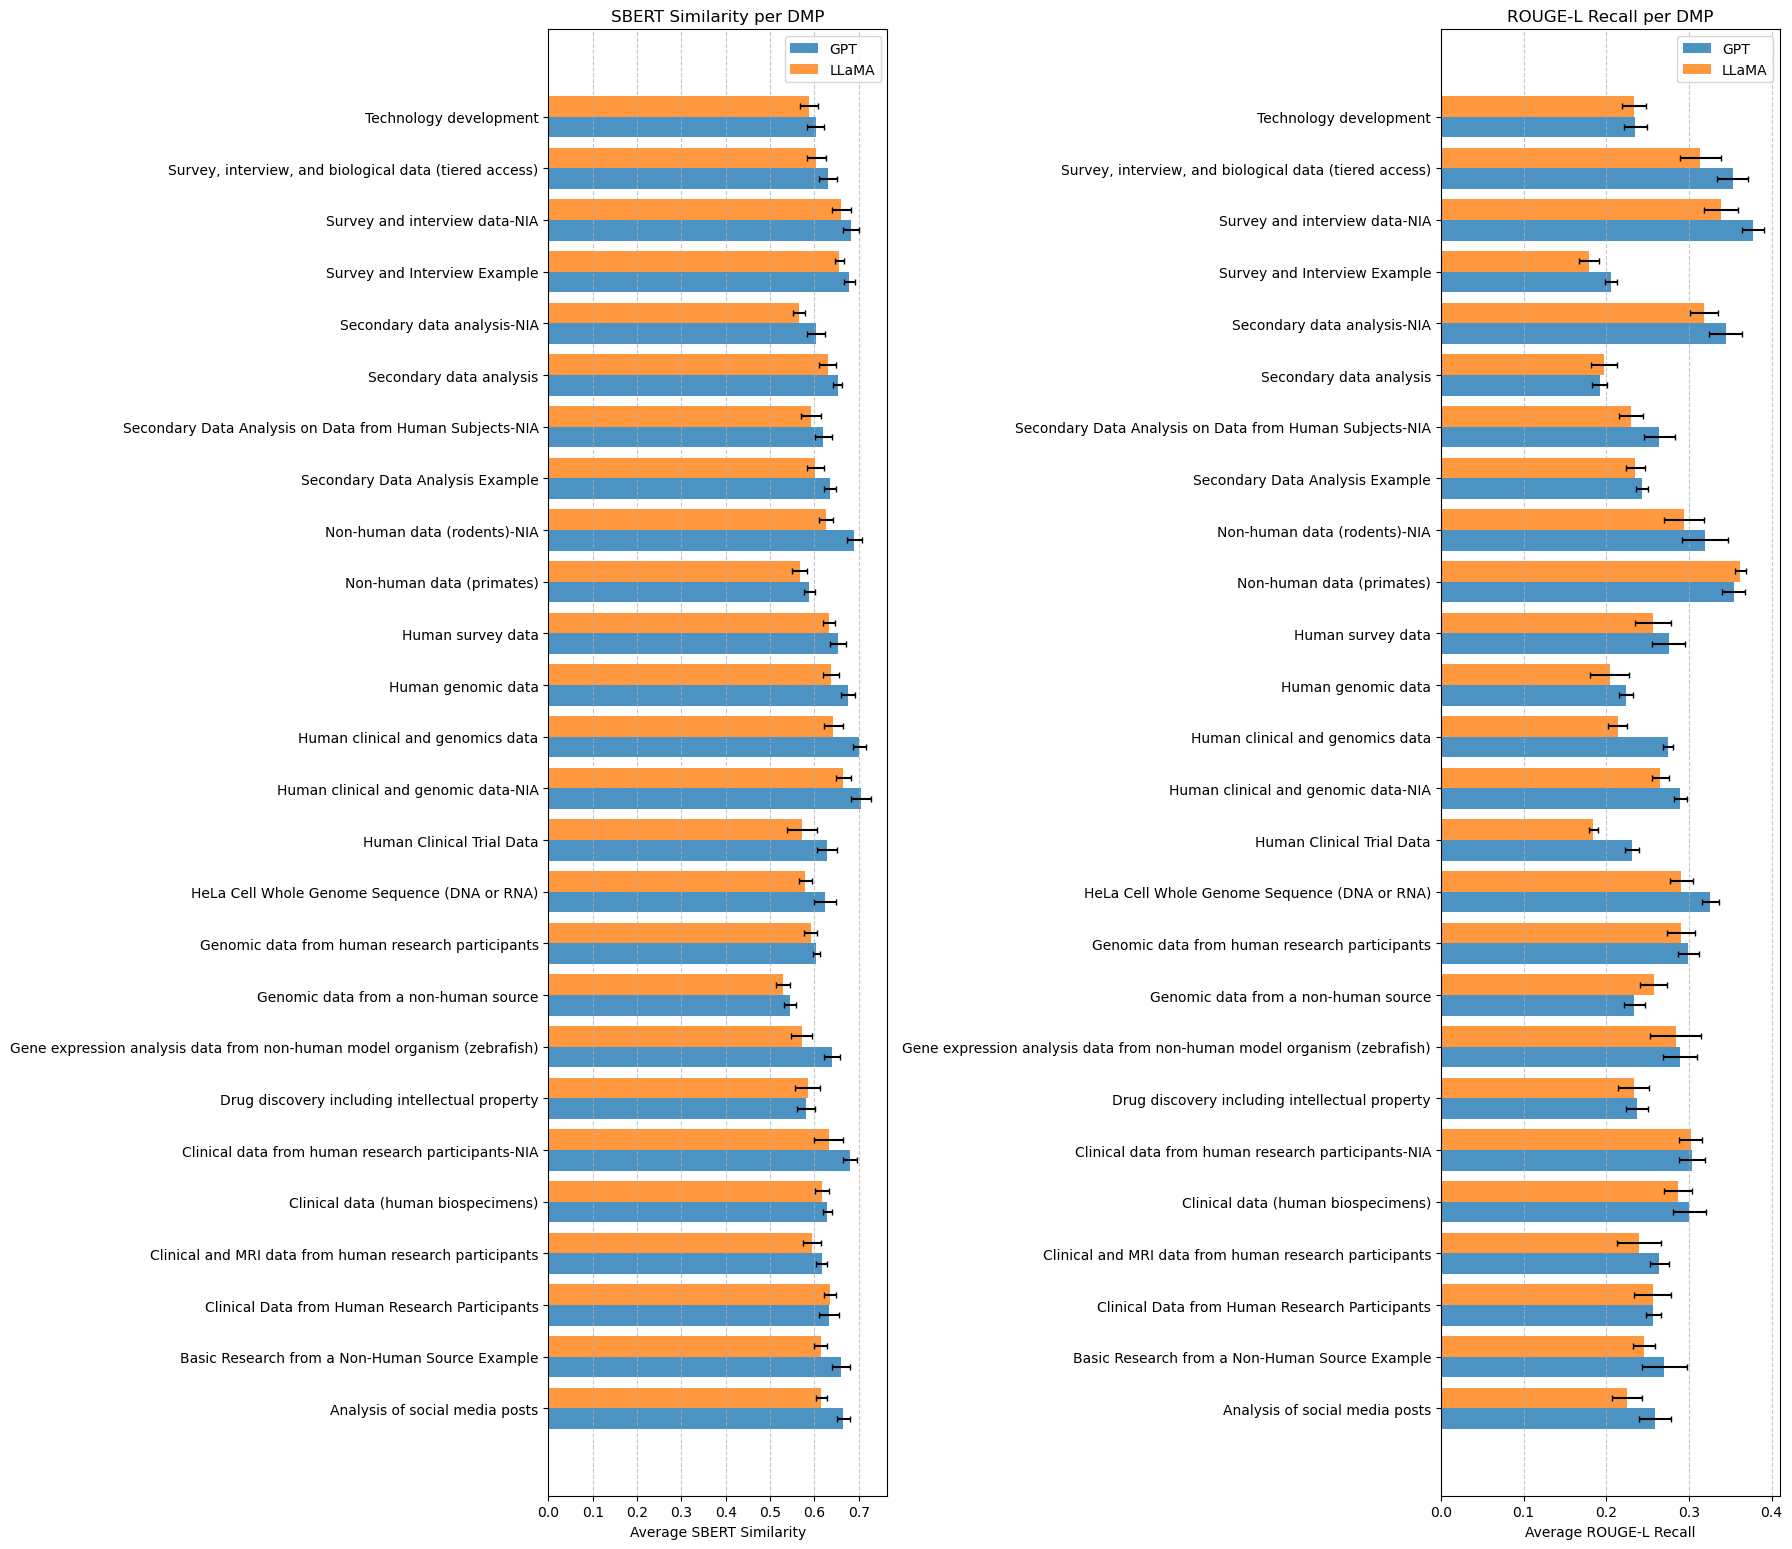

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Load folder-level comparison data
summary_dir = "outputs/folder_similarity_summary"
comparison_path = os.path.join(summary_dir, "folder_similarity_comparison.csv")
df = pd.read_csv(comparison_path)

# Group by Folder and compute mean and standard deviation across runs, then sort
grouped = df.groupby("Folder", as_index=False).agg({
    "Gpt_SBERT_Similarity": ["mean", "std"],
    "Llama_SBERT_Similarity": ["mean", "std"],
    "Gpt_ROUGE_L_Recall": ["mean", "std"],
    "Llama_ROUGE_L_Recall": ["mean", "std"]
})

# Flatten MultiIndex columns
grouped.columns = ['Folder', 'Gpt_SBERT_Mean', 'Gpt_SBERT_SD', 
                   'Llama_SBERT_Mean', 'Llama_SBERT_SD',
                   'Gpt_ROUGE_L_Mean', 'Gpt_ROUGE_L_SD', 
                   'Llama_ROUGE_L_Mean', 'Llama_ROUGE_L_SD']

# --- Plotting function for both metrics side by side ---
fig, axes = plt.subplots(1, 2, figsize=(18, len(grouped) * 0.6))

metrics = [("SBERT", "Average SBERT Similarity", "SBERT Similarity per DMP"),
           ("ROUGE_L", "Average ROUGE-L Recall", "ROUGE-L Recall per DMP")]

# Bar width and positions
bar_width = 0.4
y_positions = np.arange(len(grouped))

for ax, (metric_name, ylabel, title) in zip(axes, metrics):
    # Plot bars with error bars for SD
    ax.barh(y_positions - bar_width / 2, grouped[f'Gpt_{metric_name}_Mean'],
            xerr=grouped[f'Gpt_{metric_name}_SD'], height=bar_width, label='GPT', 
            color='#1f77b4', alpha=0.8, capsize=2)
    ax.barh(y_positions + bar_width / 2, grouped[f'Llama_{metric_name}_Mean'],
            xerr=grouped[f'Llama_{metric_name}_SD'], height=bar_width, label='LLaMA', 
            color='#ff7f0e', alpha=0.8, capsize=2)

    # Set labels and title
    ax.set_yticks(y_positions)
    ax.set_yticklabels(grouped['Folder'])
    ax.set_xlabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig(os.path.join(summary_dir, "side_by_side_similarity_recall.png"), dpi=300, bbox_inches='tight')
plt.show()


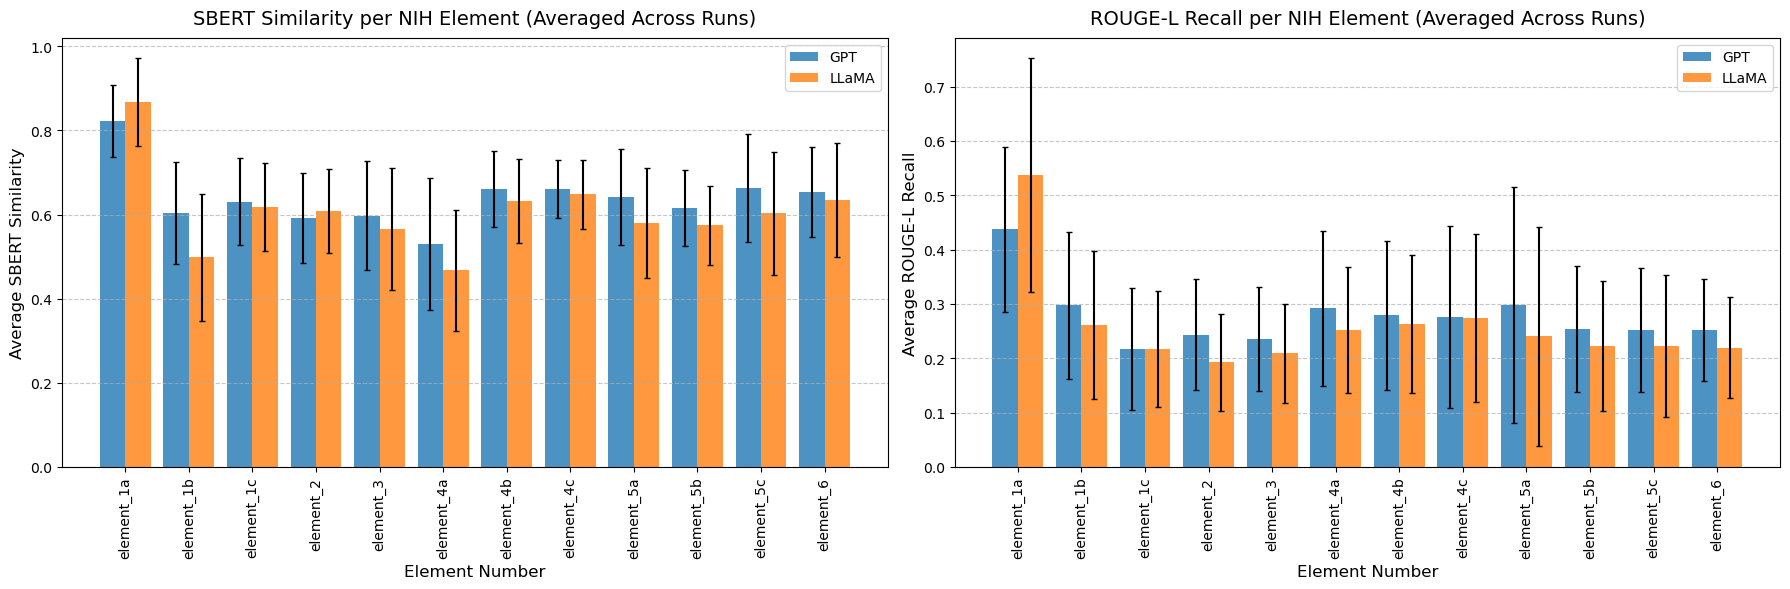

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Load element-level comparison data
summary_dir = "outputs/element_similarity_summary"
comparison_path = os.path.join(summary_dir, "element_similarity_comparison.csv")
df = pd.read_csv(comparison_path)

# Group by Element number and compute mean and standard deviation across runs
grouped = df.groupby("Element number", as_index=False).agg({
    "Gpt_SBERT_Similarity": ["mean", "std"],
    "Llama_SBERT_Similarity": ["mean", "std"],
    "Gpt_ROUGE_L_Recall": ["mean", "std"],
    "Llama_ROUGE_L_Recall": ["mean", "std"]
}).sort_values(("Element number"))

# Flatten MultiIndex columns
grouped.columns = ['Element number', 'Gpt_SBERT_Mean', 'Gpt_SBERT_SD', 
                   'Llama_SBERT_Mean', 'Llama_SBERT_SD',
                   'Gpt_ROUGE_L_Mean', 'Gpt_ROUGE_L_SD', 
                   'Llama_ROUGE_L_Mean', 'Llama_ROUGE_L_SD']

# Plotting function for both metrics side by side
def plot_metrics_side_by_side(metric1, metric2, title1, title2, ylabel1, ylabel2, file_name):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Bar width and positions
    bar_width = 0.4
    x_positions = np.arange(len(grouped))

    # First plot for SBERT Similarity
    axes[0].bar(x_positions - bar_width/2, grouped[f'Gpt_{metric1}_Mean'], 
                yerr=grouped[f'Gpt_{metric1}_SD'], width=bar_width, 
                label='GPT', color='#1f77b4', alpha=0.8, capsize=2)
    axes[0].bar(x_positions + bar_width/2, grouped[f'Llama_{metric1}_Mean'], 
                yerr=grouped[f'Llama_{metric1}_SD'], width=bar_width, 
                label='LLaMA', color='#ff7f0e', alpha=0.8, capsize=2)
    axes[0].set_xticks(x_positions)
    axes[0].set_xticklabels(grouped['Element number'], rotation=90)  # Vertical labels
    axes[0].set_xlabel("Element Number", fontsize=12)
    axes[0].set_ylabel(ylabel1, fontsize=12)
    axes[0].set_title(title1, fontsize=14, pad=10)
    axes[0].legend(loc='upper right', fontsize=10)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Second plot for ROUGE-L Recall
    axes[1].bar(x_positions - bar_width/2, grouped[f'Gpt_{metric2}_Mean'], 
                yerr=grouped[f'Gpt_{metric2}_SD'], width=bar_width, 
                label='GPT', color='#1f77b4', alpha=0.8, capsize=2)
    axes[1].bar(x_positions + bar_width/2, grouped[f'Llama_{metric2}_Mean'], 
                yerr=grouped[f'Llama_{metric2}_SD'], width=bar_width, 
                label='LLaMA', color='#ff7f0e', alpha=0.8, capsize=2)
    axes[1].set_xticks(x_positions)
    axes[1].set_xticklabels(grouped['Element number'], rotation=90)  # Vertical labels
    axes[1].set_xlabel("Element Number", fontsize=12)
    axes[1].set_ylabel(ylabel2, fontsize=12)
    axes[1].set_title(title2, fontsize=14, pad=10)
    axes[1].legend(loc='upper right', fontsize=10)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout and save
    plt.tight_layout()
    plt.savefig(os.path.join(summary_dir, file_name), dpi=300, bbox_inches='tight')
    plt.show()

# Plot SBERT Similarity and ROUGE-L Recall side by side
plot_metrics_side_by_side("SBERT", "ROUGE_L", 
                          "SBERT Similarity per NIH Element (Averaged Across Runs)", 
                          "ROUGE-L Recall per NIH Element (Averaged Across Runs)", 
                          "Average SBERT Similarity", 
                          "Average ROUGE-L Recall", 
                          "side_by_side_similarity_recall_per_element.png")


In [ ]:
####NEW

In [27]:
#! python -m pip install matplotlib


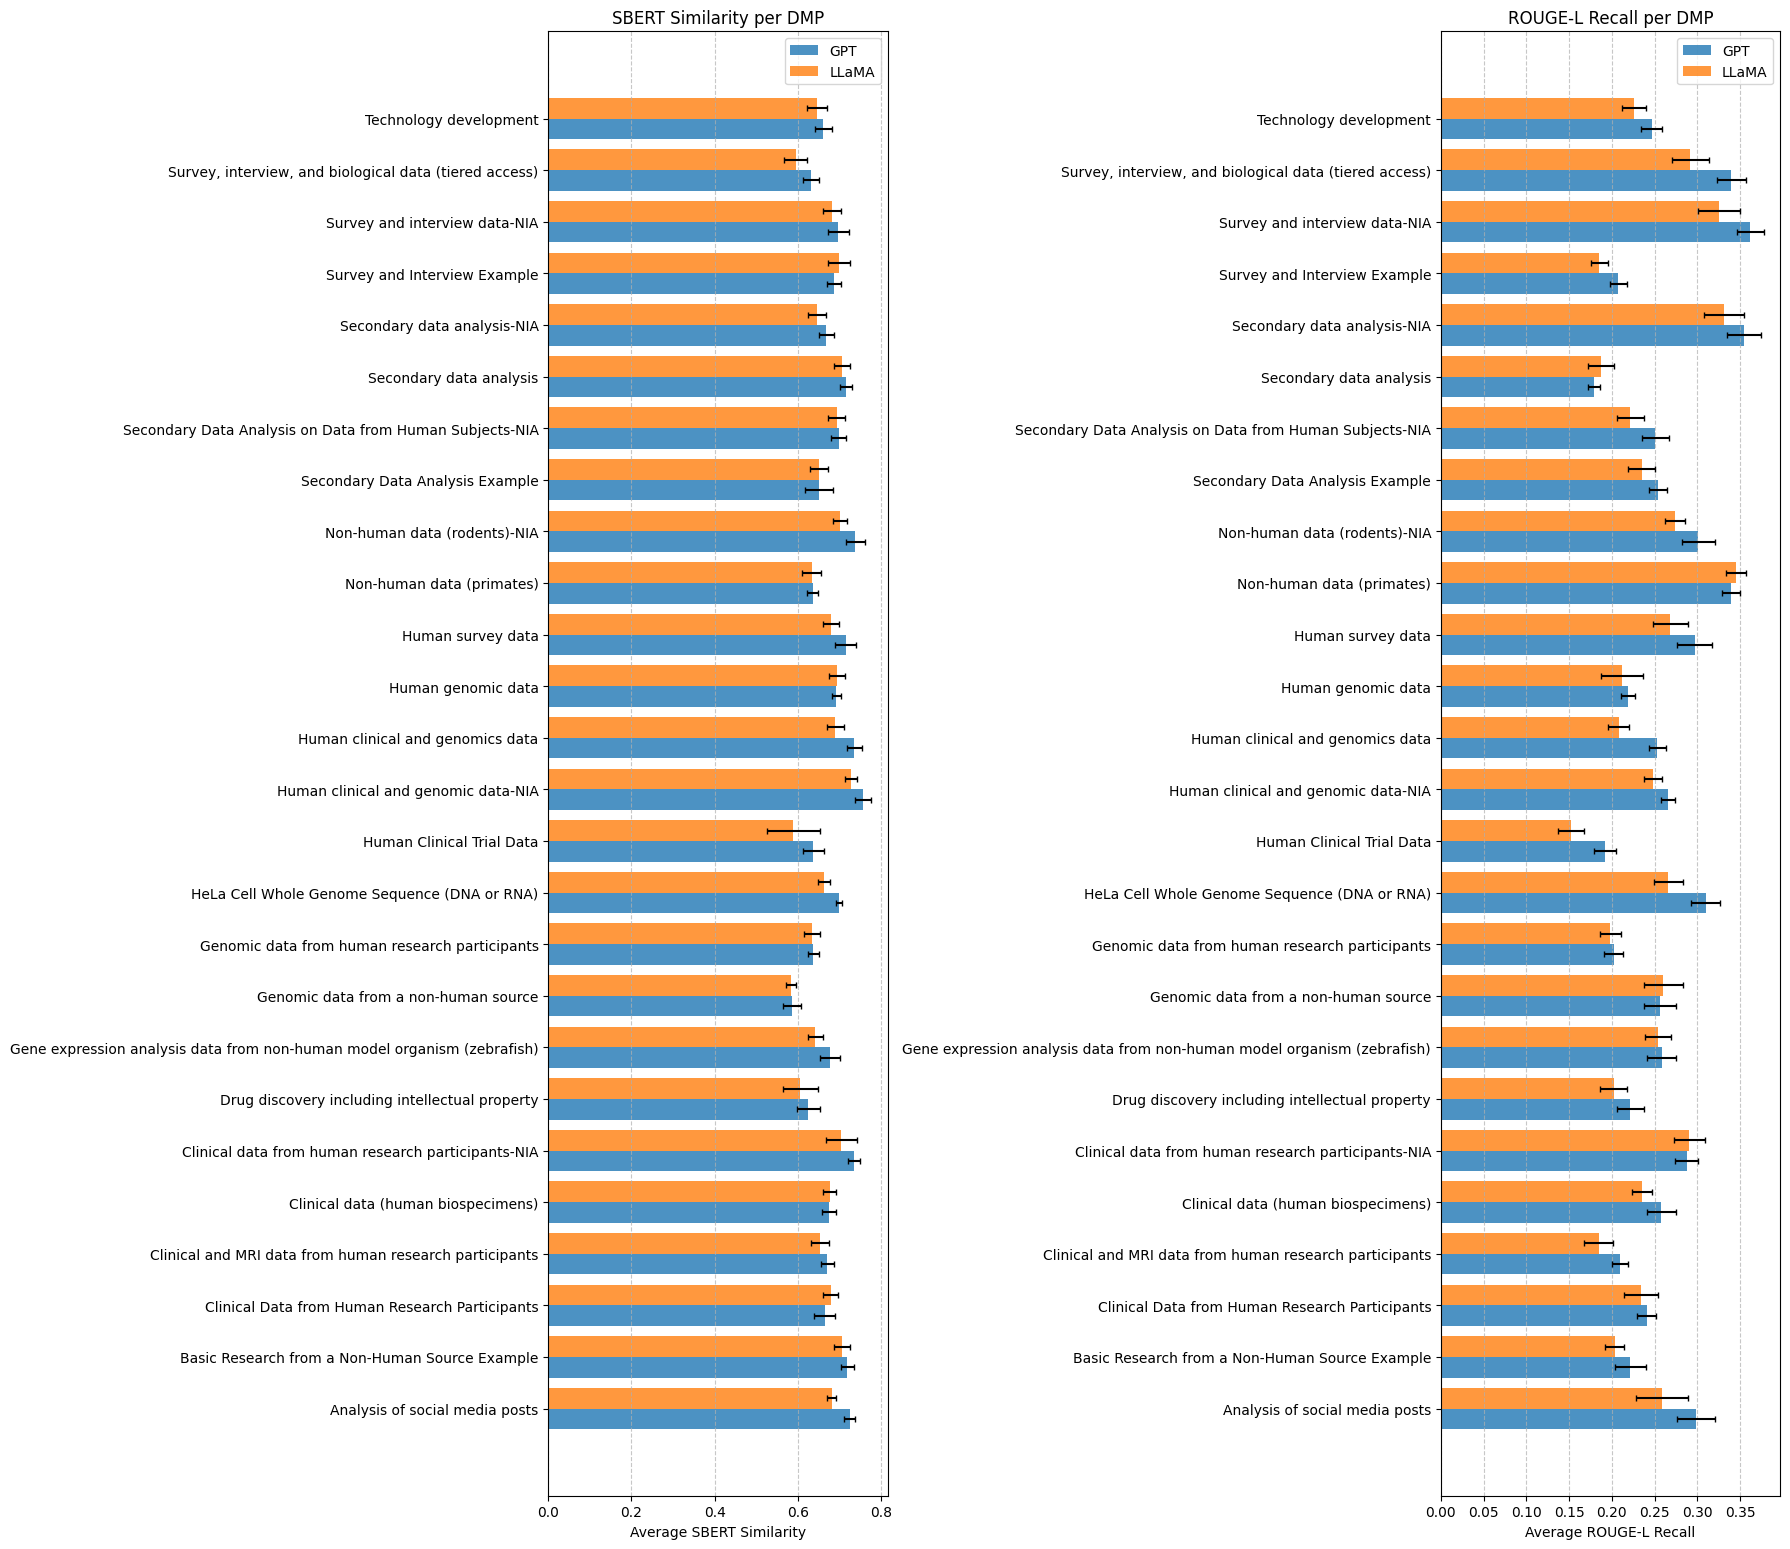

✅ Plot saved: outputs/folder_similarity_summary\side_by_side_similarity_recall_elementlevel.png


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Load folder-level comparison data (elementlevel)
summary_dir = "outputs/folder_similarity_summary"
comparison_path = os.path.join(summary_dir, "folder_similarity_comparison_elementlevel.csv")
df = pd.read_csv(comparison_path)

# Group by Folder and compute mean and standard deviation across runs, then sort
grouped = df.groupby("Folder", as_index=False).agg({
    "Gpt_SBERT_Similarity": ["mean", "std"],
    "Llama_SBERT_Similarity": ["mean", "std"],
    "Gpt_ROUGE_L_Recall": ["mean", "std"],
    "Llama_ROUGE_L_Recall": ["mean", "std"]
})

# Flatten MultiIndex columns
grouped.columns = ['Folder', 'Gpt_SBERT_Mean', 'Gpt_SBERT_SD', 
                   'Llama_SBERT_Mean', 'Llama_SBERT_SD',
                   'Gpt_ROUGE_L_Mean', 'Gpt_ROUGE_L_SD', 
                   'Llama_ROUGE_L_Mean', 'Llama_ROUGE_L_SD']

# --- Plotting function for both metrics side by side ---
fig, axes = plt.subplots(1, 2, figsize=(18, len(grouped) * 0.6))

metrics = [("SBERT", "Average SBERT Similarity", "SBERT Similarity per DMP"),
           ("ROUGE_L", "Average ROUGE-L Recall", "ROUGE-L Recall per DMP")]

# Bar width and positions
bar_width = 0.4
y_positions = np.arange(len(grouped))

for ax, (metric_name, ylabel, title) in zip(axes, metrics):
    # Plot bars with error bars for SD
    ax.barh(y_positions - bar_width / 2, grouped[f'Gpt_{metric_name}_Mean'],
            xerr=grouped[f'Gpt_{metric_name}_SD'], height=bar_width, label='GPT', 
            color='#1f77b4', alpha=0.8, capsize=2)
    ax.barh(y_positions + bar_width / 2, grouped[f'Llama_{metric_name}_Mean'],
            xerr=grouped[f'Llama_{metric_name}_SD'], height=bar_width, label='LLaMA', 
            color='#ff7f0e', alpha=0.8, capsize=2)

    # Set labels and title
    ax.set_yticks(y_positions)
    ax.set_yticklabels(grouped['Folder'])
    ax.set_xlabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
outpath = os.path.join(summary_dir, "side_by_side_similarity_recall_elementlevel.png")
plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Plot saved: {outpath}")


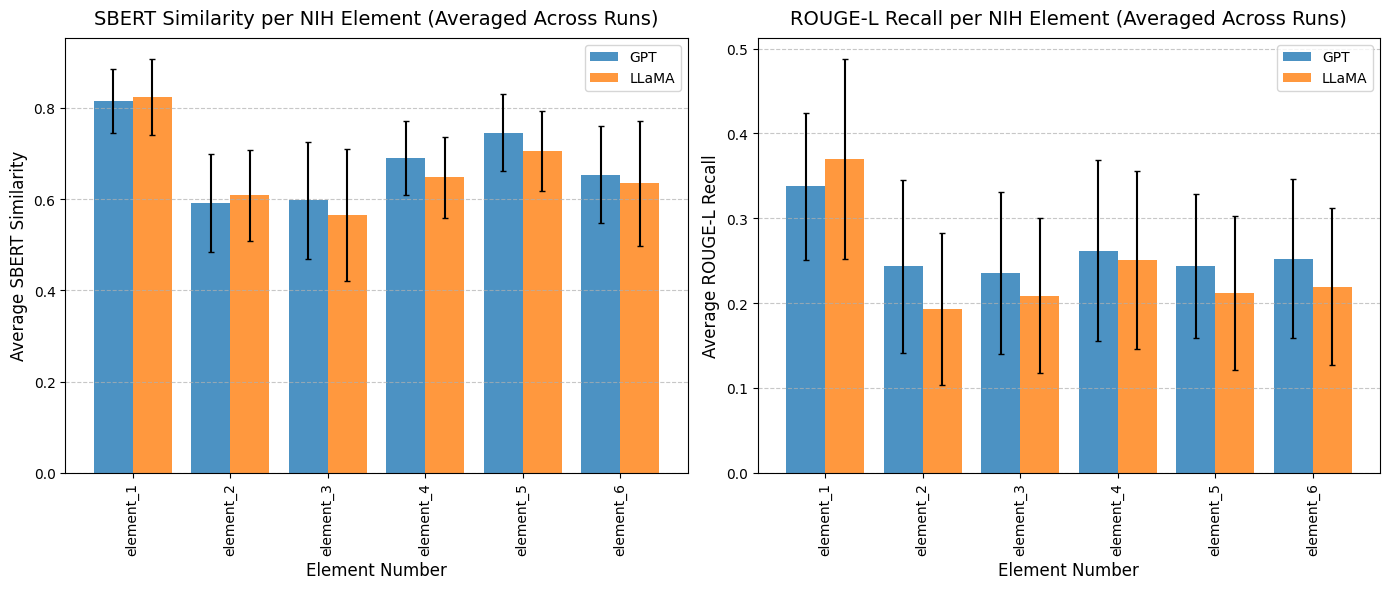

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Load element-level comparison data
summary_dir = "outputs/element_similarity_summary"
comparison_path = os.path.join(summary_dir, "element_similarity_comparison_elementlevel.csv")  # <- update for elementlevel
df = pd.read_csv(comparison_path)

# Group by Element number and compute mean and standard deviation across runs
grouped = df.groupby("Element number", as_index=False).agg({
    "Gpt_SBERT_Similarity": ["mean", "std"],
    "Llama_SBERT_Similarity": ["mean", "std"],
    "Gpt_ROUGE_L_Recall": ["mean", "std"],
    "Llama_ROUGE_L_Recall": ["mean", "std"]
}).sort_values(("Element number"))

# Flatten MultiIndex columns
grouped.columns = ['Element number', 'Gpt_SBERT_Mean', 'Gpt_SBERT_SD', 
                   'Llama_SBERT_Mean', 'Llama_SBERT_SD',
                   'Gpt_ROUGE_L_Mean', 'Gpt_ROUGE_L_SD', 
                   'Llama_ROUGE_L_Mean', 'Llama_ROUGE_L_SD']

def plot_metrics_side_by_side(metric1, metric2, title1, title2, ylabel1, ylabel2, file_name):
    fig, axes = plt.subplots(1, 2, figsize=(max(14, len(grouped)*1.2), 6))

    # Bar width and positions
    bar_width = 0.4
    x_positions = np.arange(len(grouped))

    # First plot for SBERT Similarity
    axes[0].bar(x_positions - bar_width/2, grouped[f'Gpt_{metric1}_Mean'], 
                yerr=grouped[f'Gpt_{metric1}_SD'], width=bar_width, 
                label='GPT', color='#1f77b4', alpha=0.8, capsize=2)
    axes[0].bar(x_positions + bar_width/2, grouped[f'Llama_{metric1}_Mean'], 
                yerr=grouped[f'Llama_{metric1}_SD'], width=bar_width, 
                label='LLaMA', color='#ff7f0e', alpha=0.8, capsize=2)
    axes[0].set_xticks(x_positions)
    axes[0].set_xticklabels(grouped['Element number'], rotation=90)  # Vertical labels
    axes[0].set_xlabel("Element Number", fontsize=12)
    axes[0].set_ylabel(ylabel1, fontsize=12)
    axes[0].set_title(title1, fontsize=14, pad=10)
    axes[0].legend(loc='upper right', fontsize=10)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Second plot for ROUGE-L Recall
    axes[1].bar(x_positions - bar_width/2, grouped[f'Gpt_{metric2}_Mean'], 
                yerr=grouped[f'Gpt_{metric2}_SD'], width=bar_width, 
                label='GPT', color='#1f77b4', alpha=0.8, capsize=2)
    axes[1].bar(x_positions + bar_width/2, grouped[f'Llama_{metric2}_Mean'], 
                yerr=grouped[f'Llama_{metric2}_SD'], width=bar_width, 
                label='LLaMA', color='#ff7f0e', alpha=0.8, capsize=2)
    axes[1].set_xticks(x_positions)
    axes[1].set_xticklabels(grouped['Element number'], rotation=90)  # Vertical labels
    axes[1].set_xlabel("Element Number", fontsize=12)
    axes[1].set_ylabel(ylabel2, fontsize=12)
    axes[1].set_title(title2, fontsize=14, pad=10)
    axes[1].legend(loc='upper right', fontsize=10)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout and save
    plt.tight_layout()
    plt.savefig(os.path.join(summary_dir, file_name), dpi=300, bbox_inches='tight')
    plt.show()

# Plot SBERT Similarity and ROUGE-L Recall side by side
plot_metrics_side_by_side(
    "SBERT", "ROUGE_L", 
    "SBERT Similarity per NIH Element (Averaged Across Runs)", 
    "ROUGE-L Recall per NIH Element (Averaged Across Runs)", 
    "Average SBERT Similarity", 
    "Average ROUGE-L Recall", 
    "side_by_side_similarity_recall_per_element_elementlevel.png"  # <- output filename
)
